# Customer Segmentation with K-Means Clustering

### Importing needed Libraries

In [1900]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [1901]:
dfmain = pd.read_csv('customer_purchase_data.csv')
dfmain.head().T

,0,1,2,3,4
CustomerID,1,2,3,4,5
Age,56,69,46,32,60
Gender,Female,Male,Female,Male,Male
Annual Income (k$),49,57,70,73,27
Spending Score (1-100),24,80,2,92,32
Total Purchases,3,16,23,11,12
Average Purchase Amount ($),65,359,116,840,57
Last Purchase (Days Ago),318,236,334,137,76
Preferred Product Category,Books,Electronics,Books,Books,Beauty & Health


In [1902]:
dfmain.drop_duplicates(inplace=True)
df = dfmain.drop('CustomerID',axis=1)

### Data preprocessing and statistical Analysis

In [1903]:
desc = pd.DataFrame(index = list(df))
desc['count'] = df.shape[0]
desc['null_count'] = df.isnull().sum()  
desc['unique_count'] = df.nunique()
desc['dtype'] = df.dtypes
desc = pd.concat([desc, df.describe().T], axis=1)
desc

,count,null_count,unique_count,dtype,count,mean,std,min,25%,50%,75%,max
Age,200,0,52,int64,200.0,44.010,15.226593,18.0,31.00,44.0,57.00,70.0
Gender,200,0,2,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual Income (k$),200,0,81,int64,200.0,71.035,30.009944,20.0,44.00,71.0,95.00,120.0
Spending Score (1-100),200,0,90,int64,200.0,48.620,28.873413,1.0,23.75,45.0,74.00,100.0
Total Purchases,200,0,49,int64,200.0,24.175,14.446031,1.0,11.75,24.5,34.25,50.0
Average Purchase Amount ($),200,0,181,int64,200.0,487.240,290.050424,10.0,239.50,516.0,729.25,994.0
Last Purchase (Days Ago),200,0,145,int64,200.0,191.250,107.862221,1.0,104.00,179.5,294.25,365.0
Preferred Product Category,200,0,6,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1904]:
df.columns

Index(['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Total Purchases', 'Average Purchase Amount ($)',
       'Last Purchase (Days Ago)', 'Preferred Product Category'],
      dtype='object')

### Data visualization

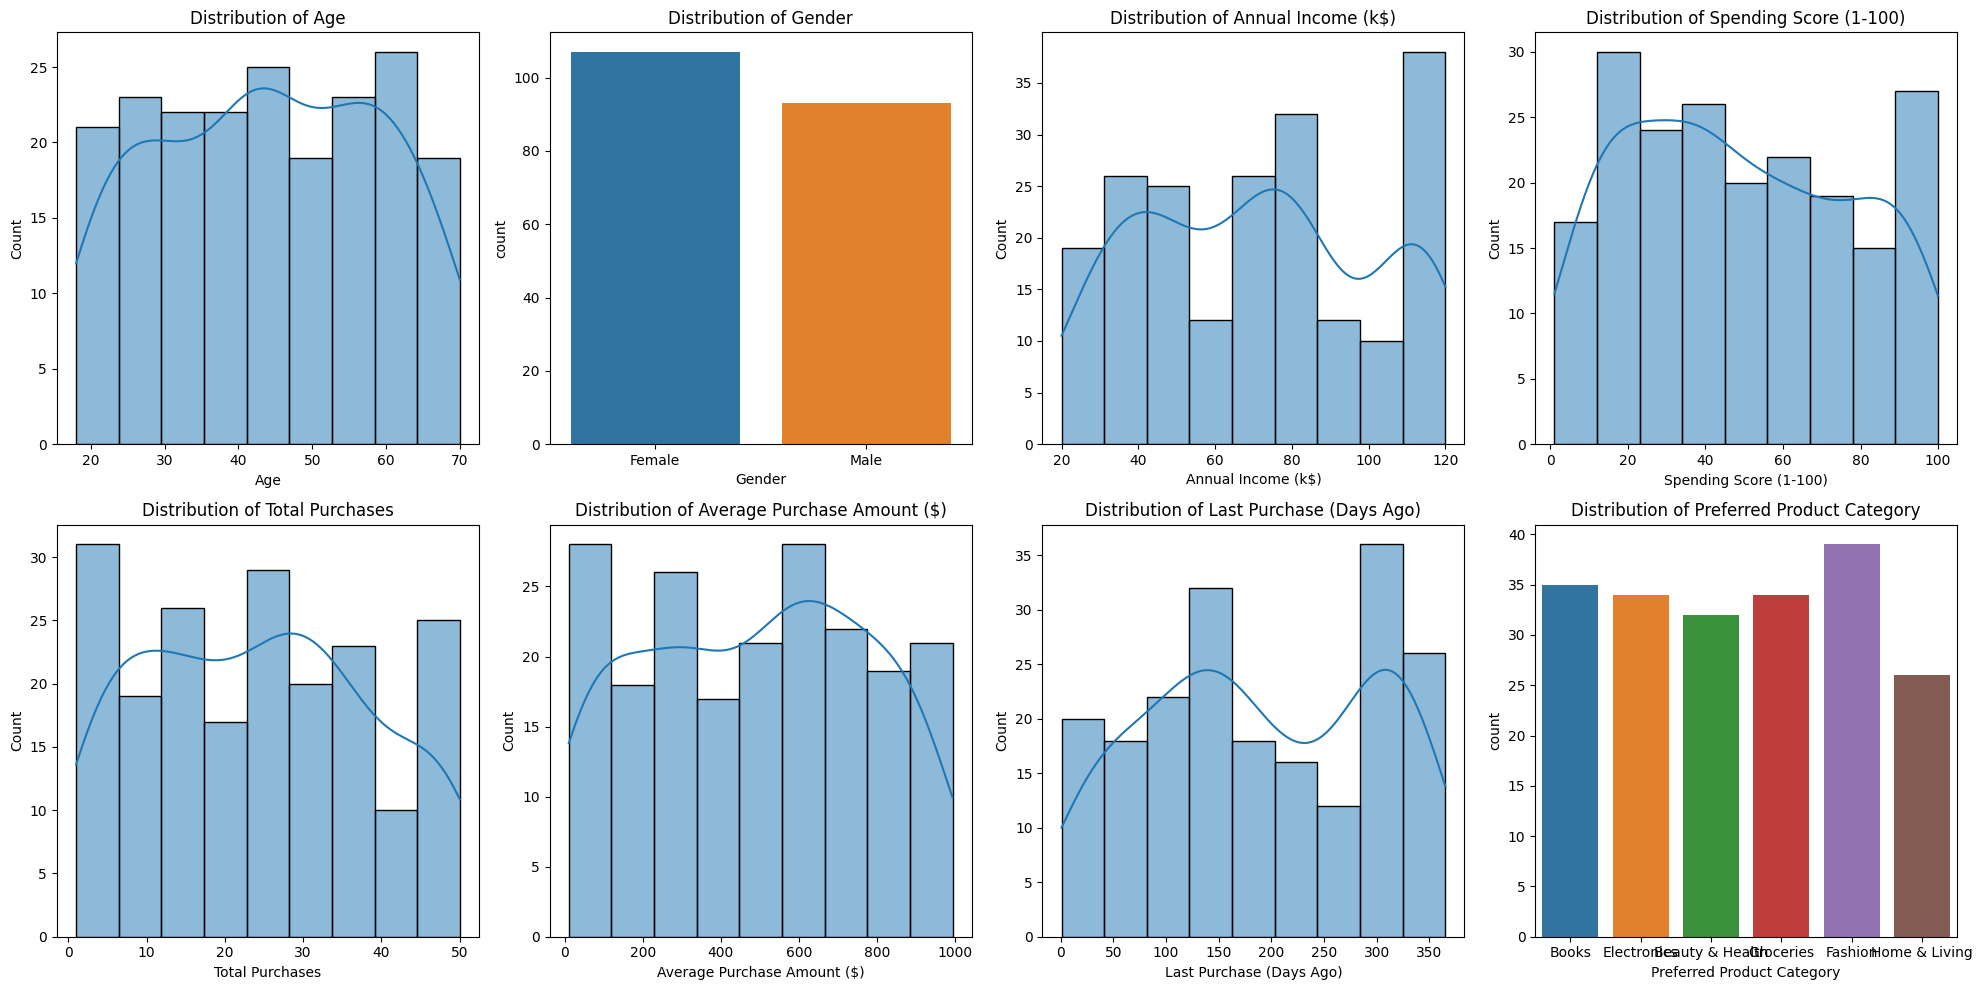

In [1905]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    if column != 'Gender' and column != 'Preferred Product Category':
        sns.histplot(data=df[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
    else:
        sns.countplot(data=df, x=column, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


[0.315, 0.285, 0.4]


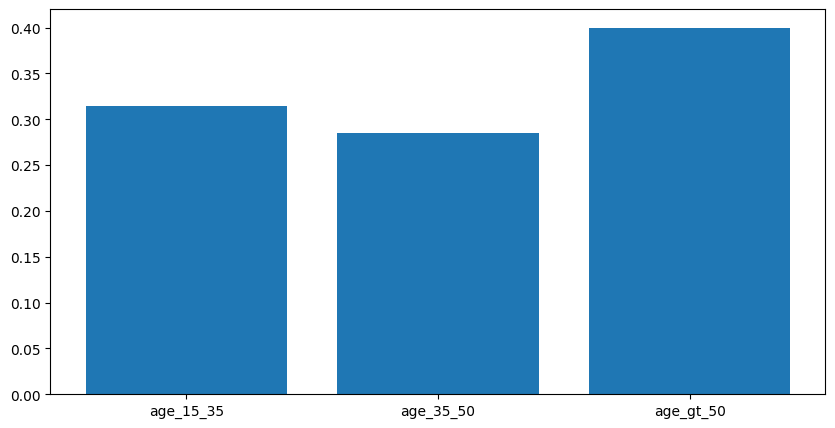

In [1906]:
count = len(df['Age'])
age_15_35 = df[(df['Age'] >= 15) & (df['Age'] < 35)]
age_35_50 = df[(df['Age'] >= 35) & (df['Age'] < 50)]
age_gt_50 = df[df['Age'] >= 50]
agex = ['age_15_35','age_35_50', 'age_gt_50']
agey = [len(age_15_35)/count,len(age_35_50)/count, len(age_gt_50)/count]
plt.figure(figsize=(10, 5))
plt.bar(agex, agey)
print(agey)

In [1907]:
def agegp(data):
    if data>=15 and data<35:
        return 'age_15_35'
    elif data>=35 and data<50:
        return 'age_35_50'
    elif data>=50: 
        return 'age_gt_50'
    else:
        return 'other'

In [1908]:
df['Age_gp']=df['Age'].apply(agegp)

In [1909]:
df[['Age','Age_gp']].head()

,Age,Age_gp
0,56,age_gt_50
1,69,age_gt_50
2,46,age_35_50
3,32,age_15_35
4,60,age_gt_50


- The dataset has 200 rows and 9 columns including the customerID column. 

- It has customer details with min age of 18 and max age of 70. The average age is 44 years.
- The annual income is in the range of 20k-120k and the average annual income is 71k.
- The spending score is in the range of 1-100 and the average spending score is 48.62.
- The purchase frequency according to last purchase varies from 1 to 365 days.

- 31.5% of the customers are in the age group of 18-35 years. 
- 28.5% of the customers re in the age group of 35-50 years.
- 40% of the customers are in the age group of 50-70 years.

- Gender distribution in the dataset is quite balanced

## Annual Income and Spending Score

### Clustering using Annual Income and Spending Score

c:\Users\farzi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\farzi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\farzi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\farzi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\

c:\Users\farzi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


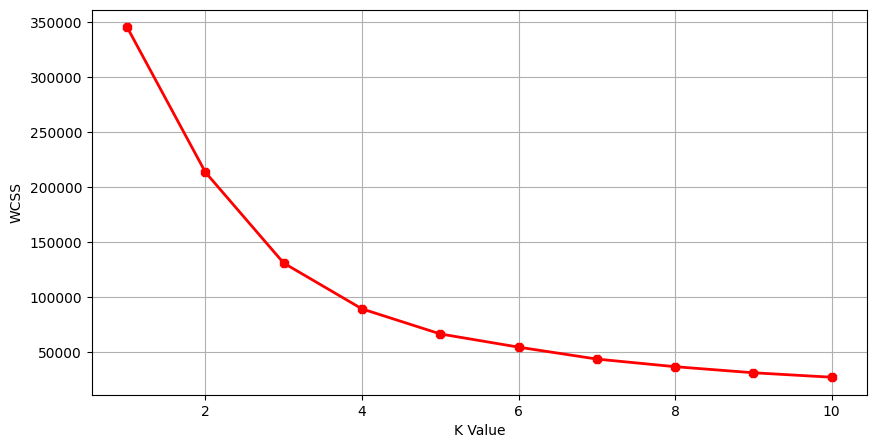

In [1910]:
x1=df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values
ce=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x1)
    ce.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(1,11),ce,linewidth=2,color='red',marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [1911]:
kmeans=KMeans(n_clusters=6,random_state=42)
label = kmeans.fit_predict(x1)
# Choose a specific cluster you want to analyze (e.g., cluster 0)
cluster_to_analyze = 0

# Filter data points that belong to the chosen cluster
cluster_data_points = x1[label == cluster_to_analyze]
# print(label)

c:\Users\farzi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


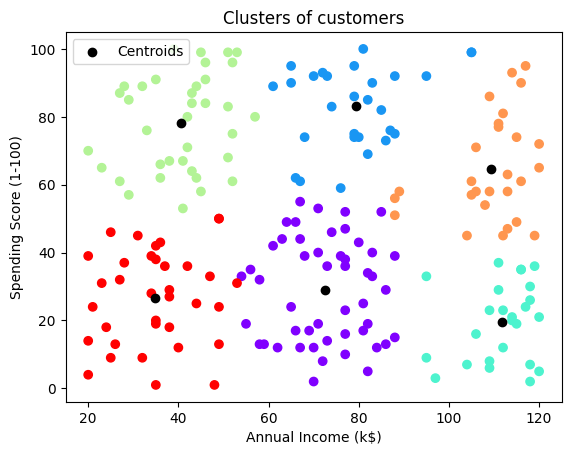

In [1912]:
centroids=kmeans.cluster_centers_
# centroids
plt.scatter(x1[:,0],x1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(centroids[:,0],centroids[:,1],c='black',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

In [1913]:
df['anninc_label'] = label

In [1914]:
df.columns

Index(['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Total Purchases', 'Average Purchase Amount ($)',
       'Last Purchase (Days Ago)', 'Preferred Product Category', 'Age_gp',
       'anninc_label'],
      dtype='object')

### Anlayzing the cluster 1

(49, 9)


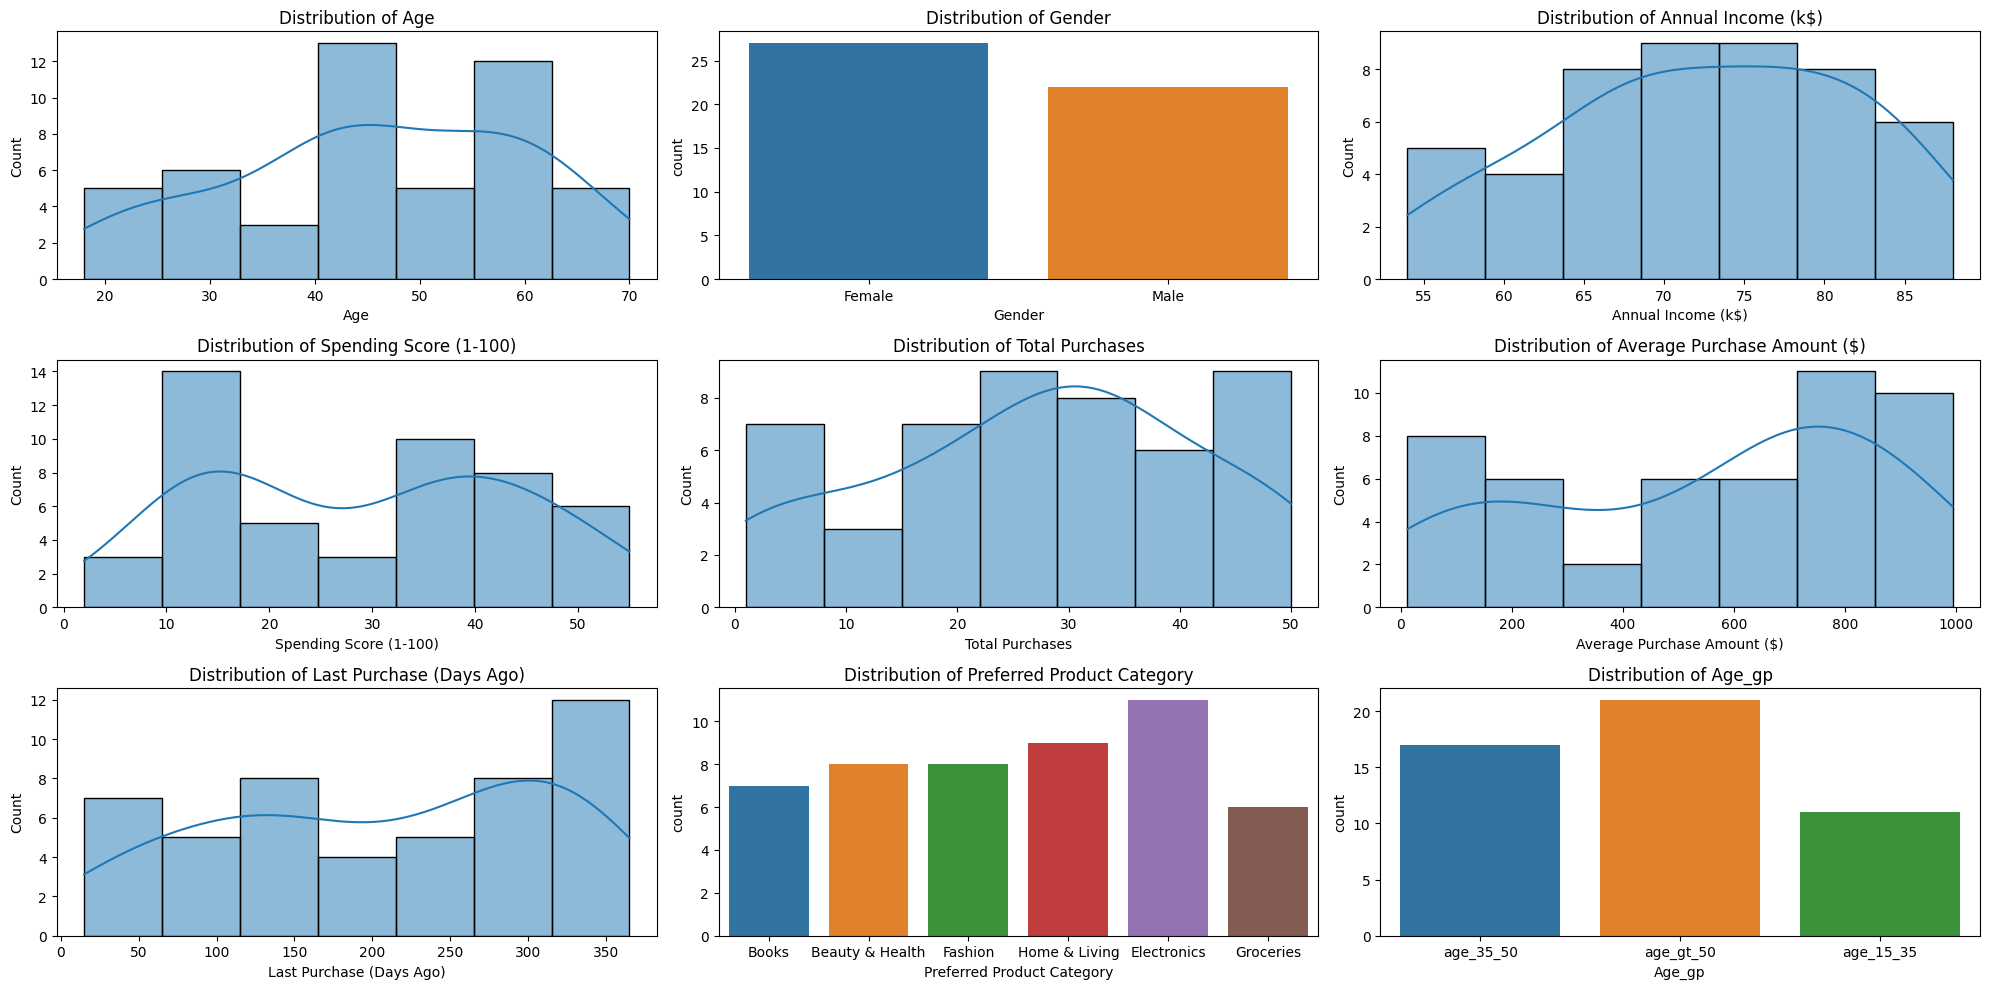

In [1915]:

dftemp = df[df['anninc_label']==0].drop('anninc_label',axis=1,inplace=False)
print(dftemp.shape)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

axes = axes.flatten()

for i, column in enumerate(dftemp.columns):
    if column != 'anninc_label' and column != 'Preferred Product Category'and column != 'Gender' and column!='Age_gp':
        sns.histplot(data=dftemp[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
    else:
        sns.countplot(data=dftemp, x=column, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


In [1916]:
dftemp.describe()

,Age,Annual Income (k$),Spending Score (1-100),Total Purchases,Average Purchase Amount ($),Last Purchase (Days Ago)
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,45.836735,72.571429,28.897959,27.081633,554.102041,207.693878
std,14.211713,9.347460,14.993394,14.625658,312.403535,107.528718
min,18.000000,54.000000,2.000000,1.000000,12.000000,15.000000
25%,39.000000,66.000000,15.000000,17.000000,238.000000,127.000000
50%,46.000000,73.000000,32.000000,28.000000,640.000000,216.000000
75%,58.000000,81.000000,40.000000,37.000000,785.000000,296.000000
max,70.000000,88.000000,55.000000,50.000000,994.000000,365.000000


- #### 24.5% customers belongs to the cluster 1.
- #### In the first cluster Annual Income ranges from 54-88k and spending score ranges from 2-55.
- #### 50% of the customers are under 46 years of age.
- #### Electronics and Home&Living are most preferred products by this cluster.

### cluster2

(28, 9)


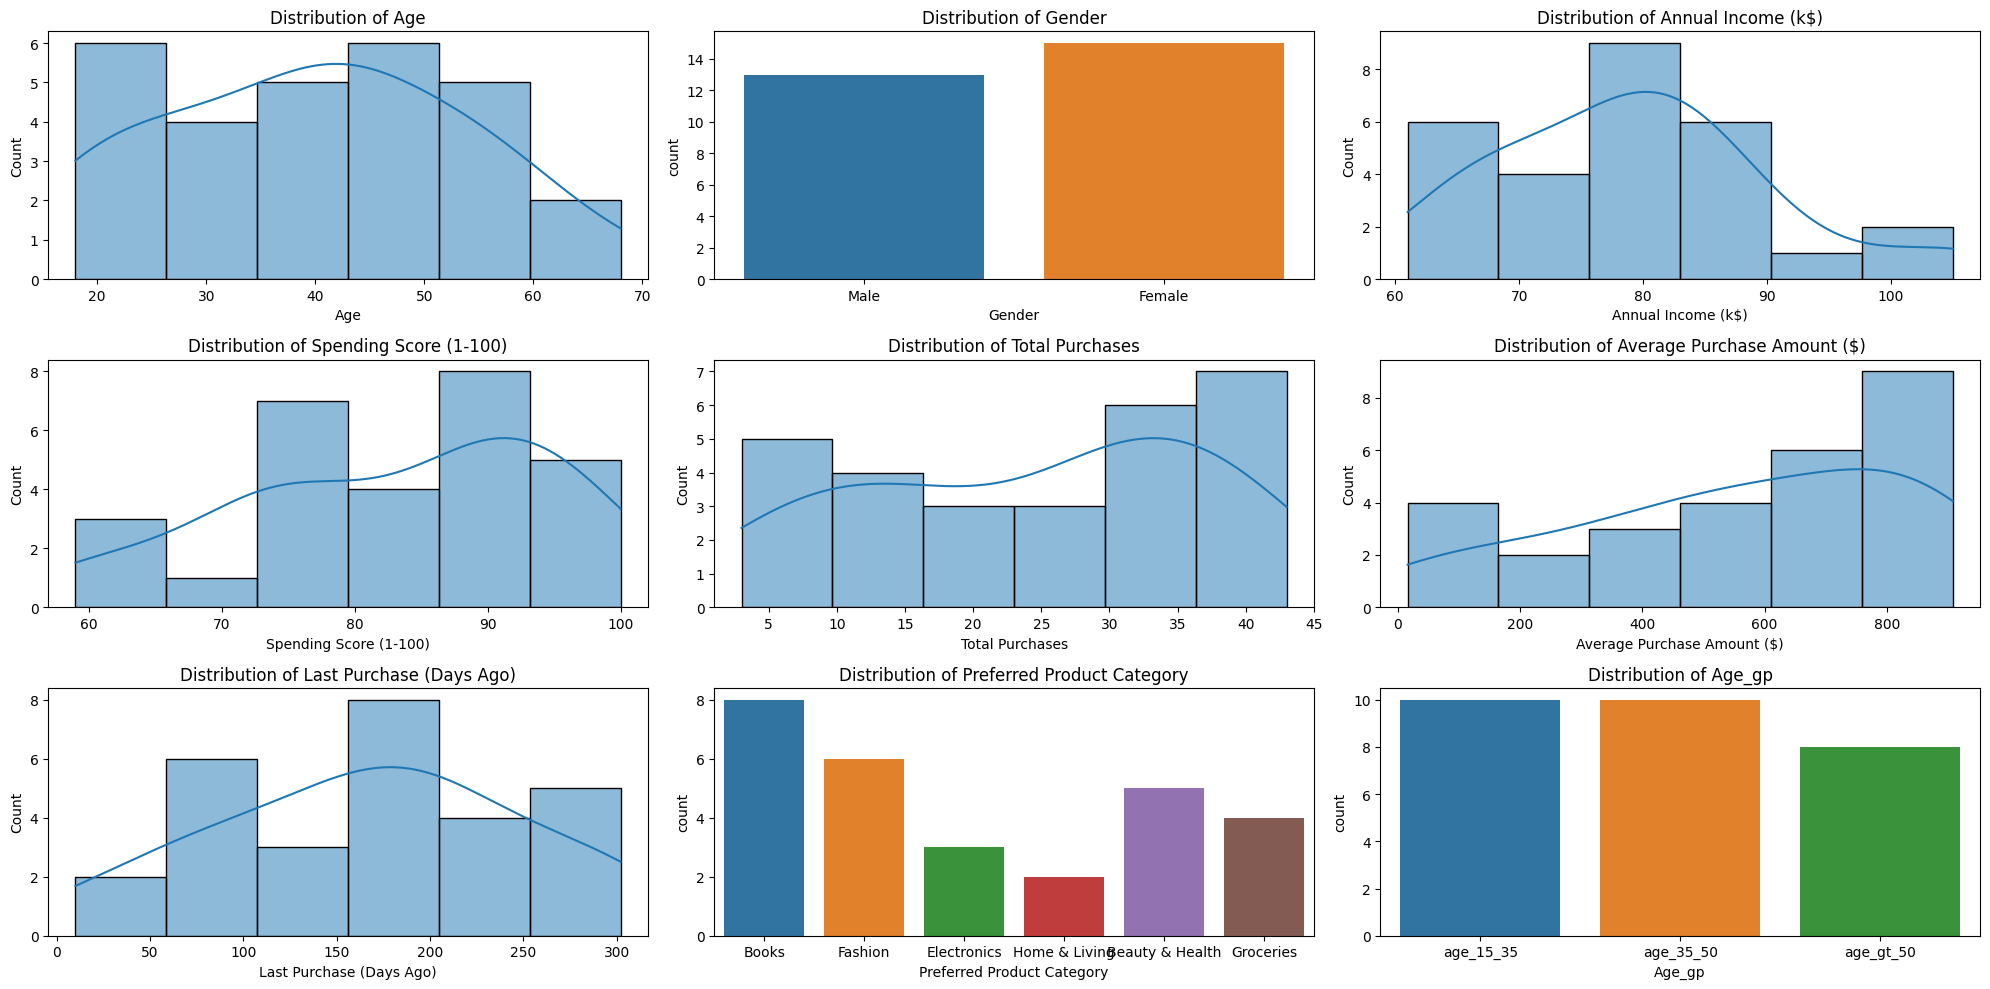

In [1917]:

dftemp = df[df['anninc_label']==1].drop('anninc_label',axis=1,inplace=False)
print(dftemp.shape)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

axes = axes.flatten()

for i, column in enumerate(dftemp.columns):
    if column != 'anninc_label' and column != 'Preferred Product Category' and column != 'Gender' and column!='Age_gp':
        sns.histplot(data=dftemp[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
    else:
        sns.countplot(data=dftemp, x=column, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


In [1918]:
dftemp.describe()

,Age,Annual Income (k$),Spending Score (1-100),Total Purchases,Average Purchase Amount ($),Last Purchase (Days Ago)
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,39.678571,79.285714,83.071429,24.464286,560.821429,167.714286
std,14.084543,11.064984,11.984337,12.755484,274.635793,83.068850
min,18.000000,61.000000,59.000000,3.000000,16.000000,10.000000
25%,29.500000,71.500000,74.000000,13.750000,361.500000,104.000000
50%,41.500000,79.000000,85.500000,26.500000,618.500000,172.000000
75%,50.750000,85.250000,92.000000,34.750000,833.750000,214.500000
max,68.000000,105.000000,100.000000,43.000000,908.000000,302.000000


- #### 14% customers belongs to the cluster 2.
- #### In the second cluster Annual Income ranges from 61-105k and spending score ranges from 59-100.
- #### 50% of the customers are under 41 years of age.
- #### Books and Fashion products are most preferred by the customers.

### cluster 3

(25, 9)


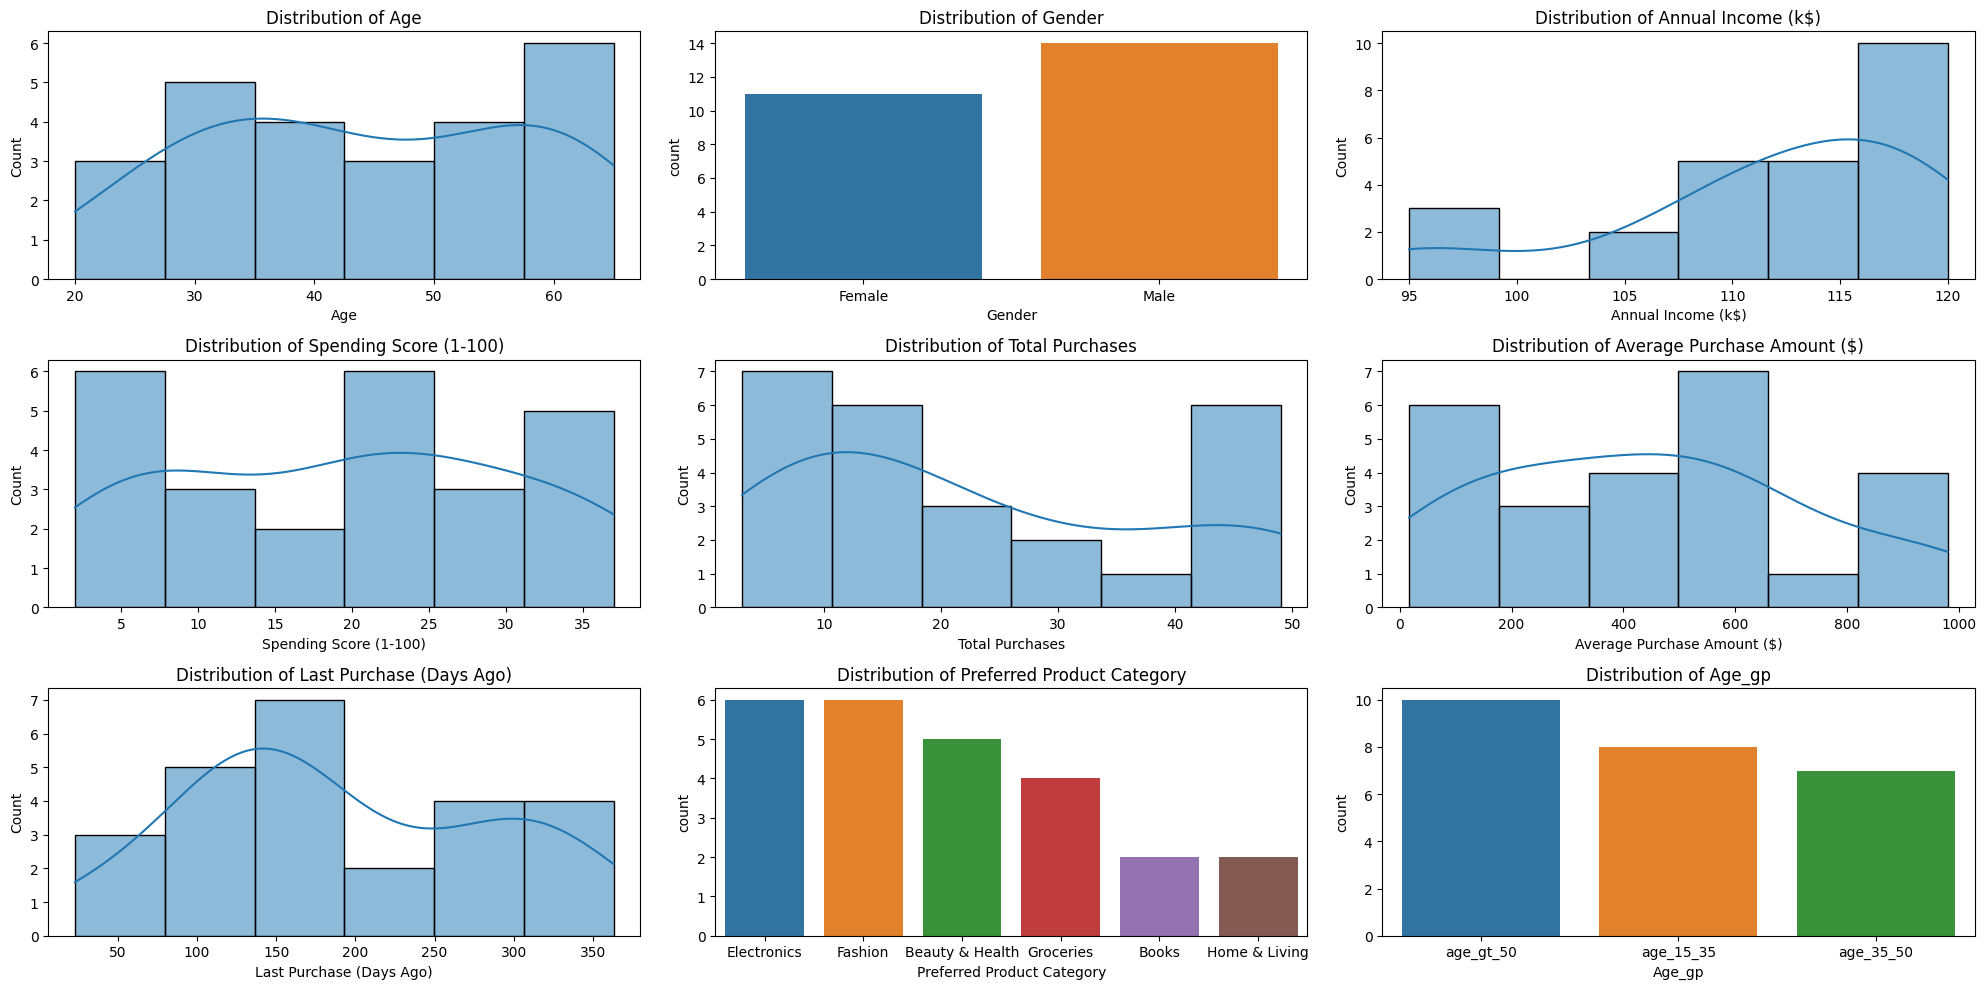

In [1919]:

dftemp = df[df['anninc_label']==2].drop('anninc_label',axis=1,inplace=False)
print(dftemp.shape)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

axes = axes.flatten()

for i, column in enumerate(dftemp.columns):
    if column != 'anninc_label' and column != 'Preferred Product Category' and column != 'Gender' and column!='Age_gp':
        sns.histplot(data=dftemp[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
    else:
        sns.countplot(data=dftemp, x=column, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


In [1920]:
dftemp.describe()

,Age,Annual Income (k$),Spending Score (1-100),Total Purchases,Average Purchase Amount ($),Last Purchase (Days Ago)
count,25.000000,25.000000,25.0000,25.000000,25.000000,25.000000
mean,44.520000,111.720000,19.4800,22.760000,446.440000,191.000000
std,13.925756,7.430343,11.4168,16.057916,289.806556,96.398046
min,20.000000,95.000000,2.0000,3.000000,17.000000,23.000000
25%,33.000000,109.000000,8.0000,9.000000,201.000000,132.000000
50%,45.000000,114.000000,21.0000,17.000000,403.000000,157.000000
75%,57.000000,118.000000,29.0000,34.000000,616.000000,288.000000
max,65.000000,120.000000,37.0000,49.000000,980.000000,363.000000


- #### 12.5% customers belongs to the cluster 3.
- #### In the third cluster Annual Income ranges from 95-120k and spending score ranges from 2-37.
- #### 50% of the customers are under 45 years of age.
- #### Fashion and Electronics products are most preferred by the customers.

### cluster 4

(36, 9)


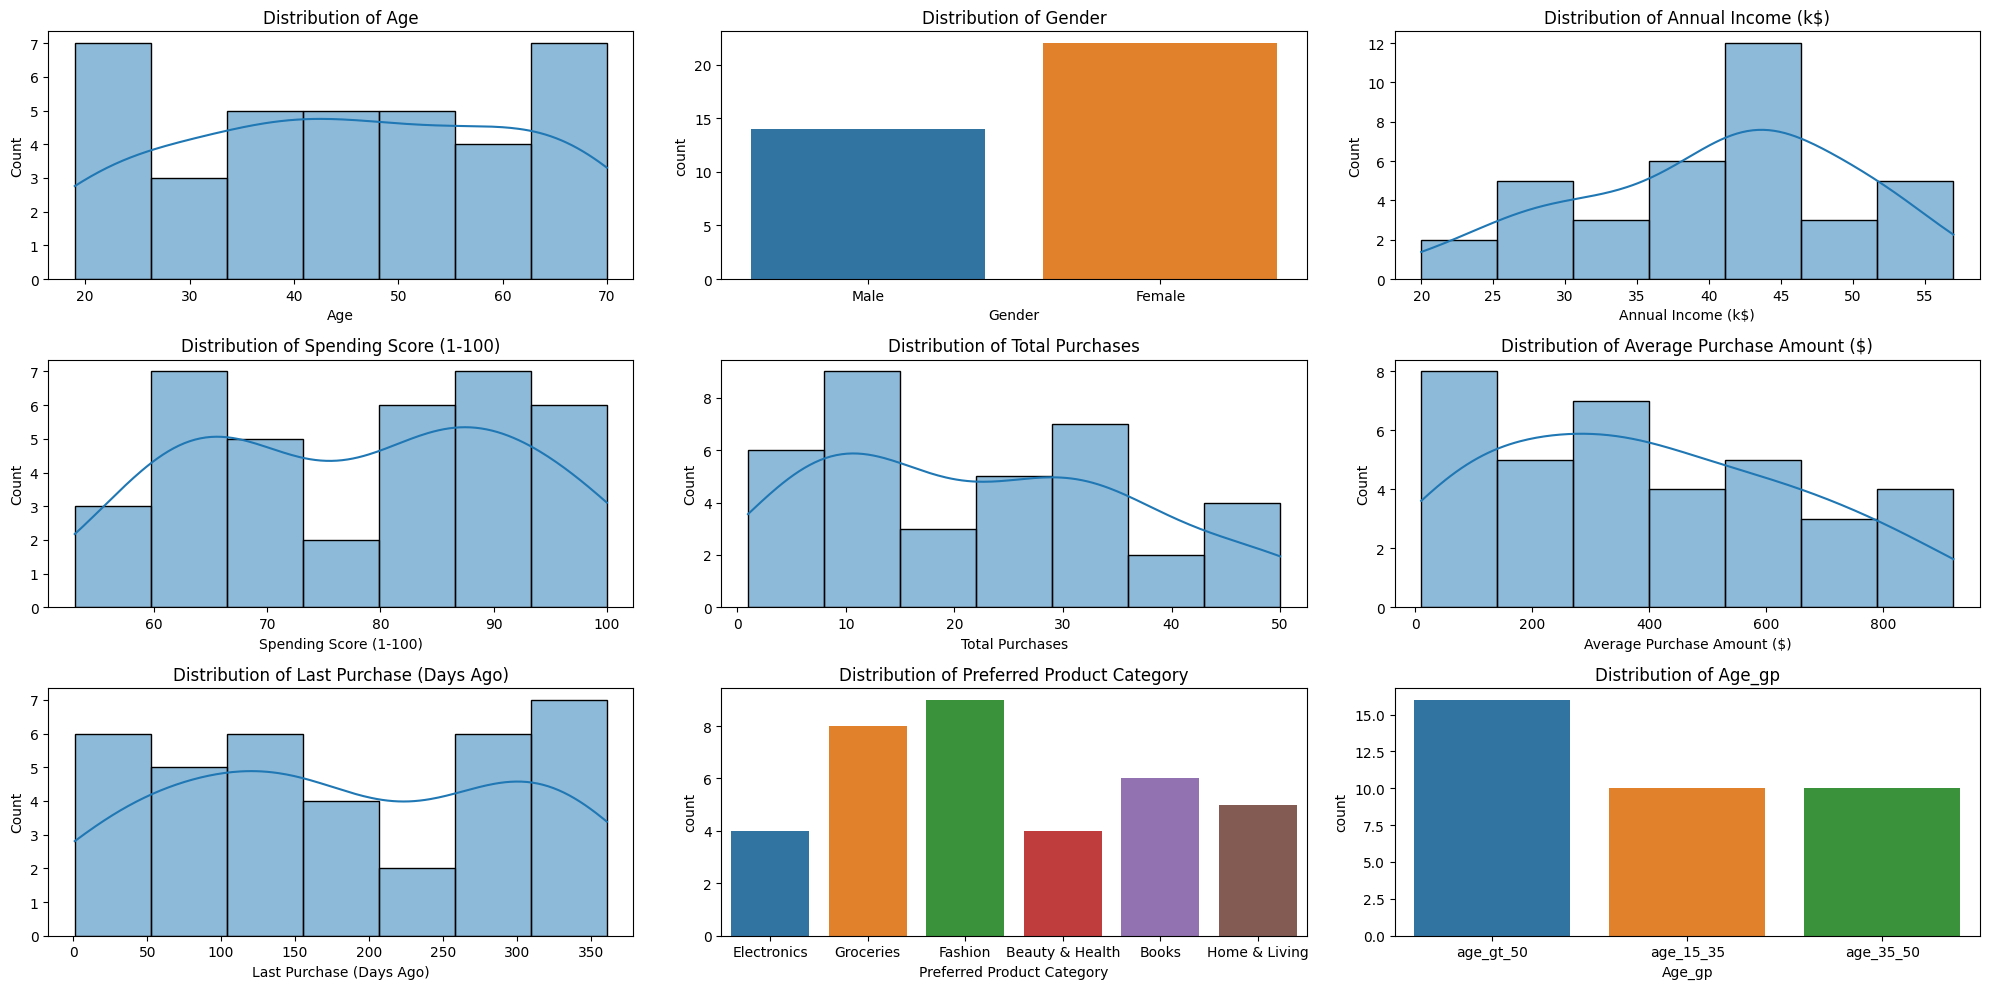

In [1921]:

dftemp = df[df['anninc_label']==3].drop('anninc_label',axis=1,inplace=False)
print(dftemp.shape)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

axes = axes.flatten()

for i, column in enumerate(dftemp.columns):
    if column != 'anninc_label' and column != 'Preferred Product Category' and column != 'Gender' and column!='Age_gp':
        sns.histplot(data=dftemp[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
    else:
        sns.countplot(data=dftemp, x=column, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


In [1922]:
dftemp.describe()

,Age,Annual Income (k$),Spending Score (1-100),Total Purchases,Average Purchase Amount ($),Last Purchase (Days Ago)
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,45.472222,40.611111,78.083333,22.388889,390.861111,185.722222
std,16.494997,9.342003,14.146933,14.635139,261.402826,117.361374
min,19.000000,20.000000,53.000000,1.000000,10.000000,1.000000
25%,31.750000,34.500000,65.750000,10.000000,171.250000,93.750000
50%,45.500000,42.500000,80.000000,21.500000,352.500000,168.000000
75%,61.000000,46.000000,89.000000,33.250000,587.500000,294.500000
max,70.000000,57.000000,100.000000,50.000000,920.000000,361.000000


- #### 18% customers belongs to the cluster 4.
- #### In the fourth cluster Annual Income ranges from 20-57k and spending score ranges from 53-100.
- #### 50% of the customers are under 45 years of age.
- #### Fashion and Groceries products are most preferred by the customers.

### cluster 5

(27, 9)


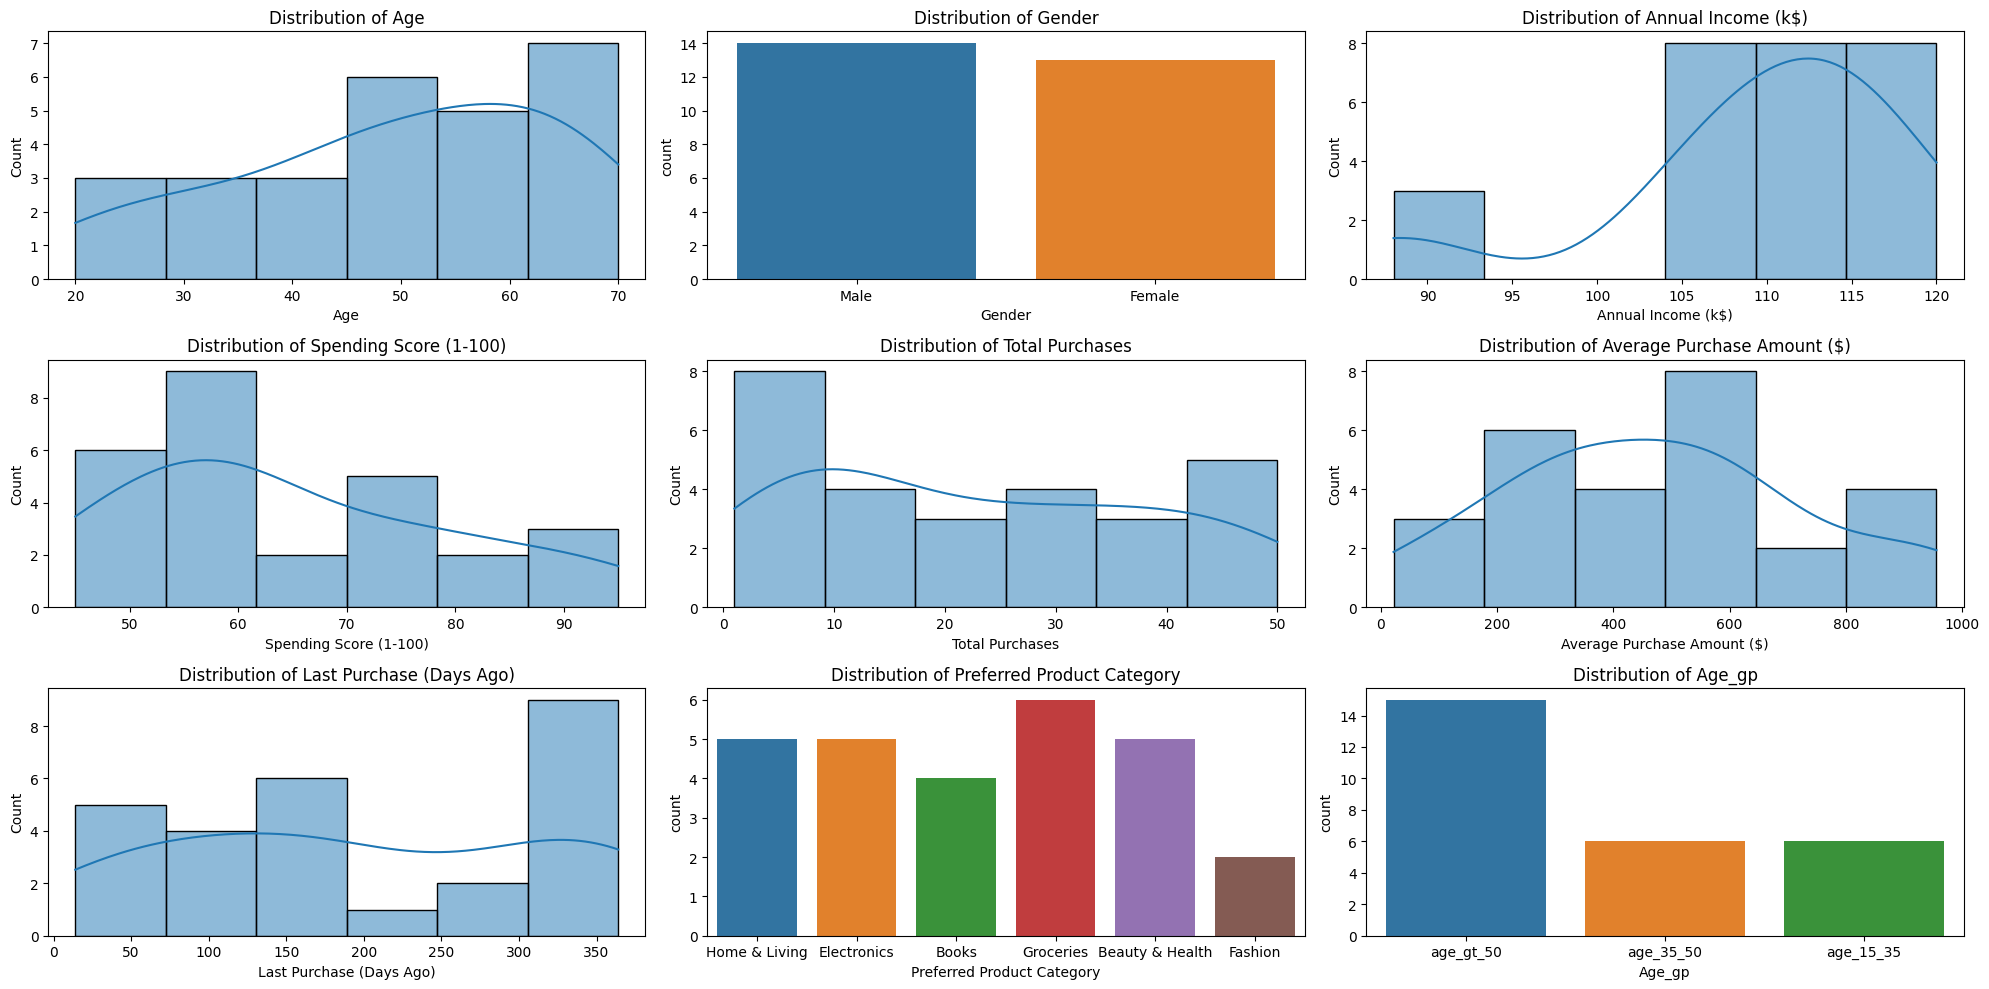

In [1923]:

dftemp = df[df['anninc_label']==4].drop('anninc_label',axis=1,inplace=False)
print(dftemp.shape)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

axes = axes.flatten()

for i, column in enumerate(dftemp.columns):
    if column != 'anninc_label' and column != 'Preferred Product Category' and column != 'Gender' and column!='Age_gp':
        sns.histplot(data=dftemp[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
    else:
        sns.countplot(data=dftemp, x=column, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


In [1924]:
dftemp.describe()

,Age,Annual Income (k$),Spending Score (1-100),Total Purchases,Average Purchase Amount ($),Last Purchase (Days Ago)
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,49.481481,109.407407,64.740741,23.000000,476.481481,199.074074
std,15.118431,8.832890,15.136793,16.057589,260.173074,123.090625
min,20.000000,88.000000,45.000000,1.000000,22.000000,14.000000
25%,41.000000,106.000000,55.000000,8.500000,310.000000,92.500000
50%,52.000000,112.000000,61.000000,21.000000,515.000000,177.000000
75%,61.500000,115.000000,75.500000,37.000000,611.500000,330.000000
max,70.000000,120.000000,95.000000,50.000000,956.000000,364.000000


- #### 13.5% customers belongs to the cluster 5.
- #### In the fifth cluster Annual Income ranges from 88-120k and spending score ranges from 45-95.
- #### 50% of the customers are under 52 years of age.
- #### Groceries and Beauty&Health products are most preferred by the customers.

### cluster 6

(35, 9)


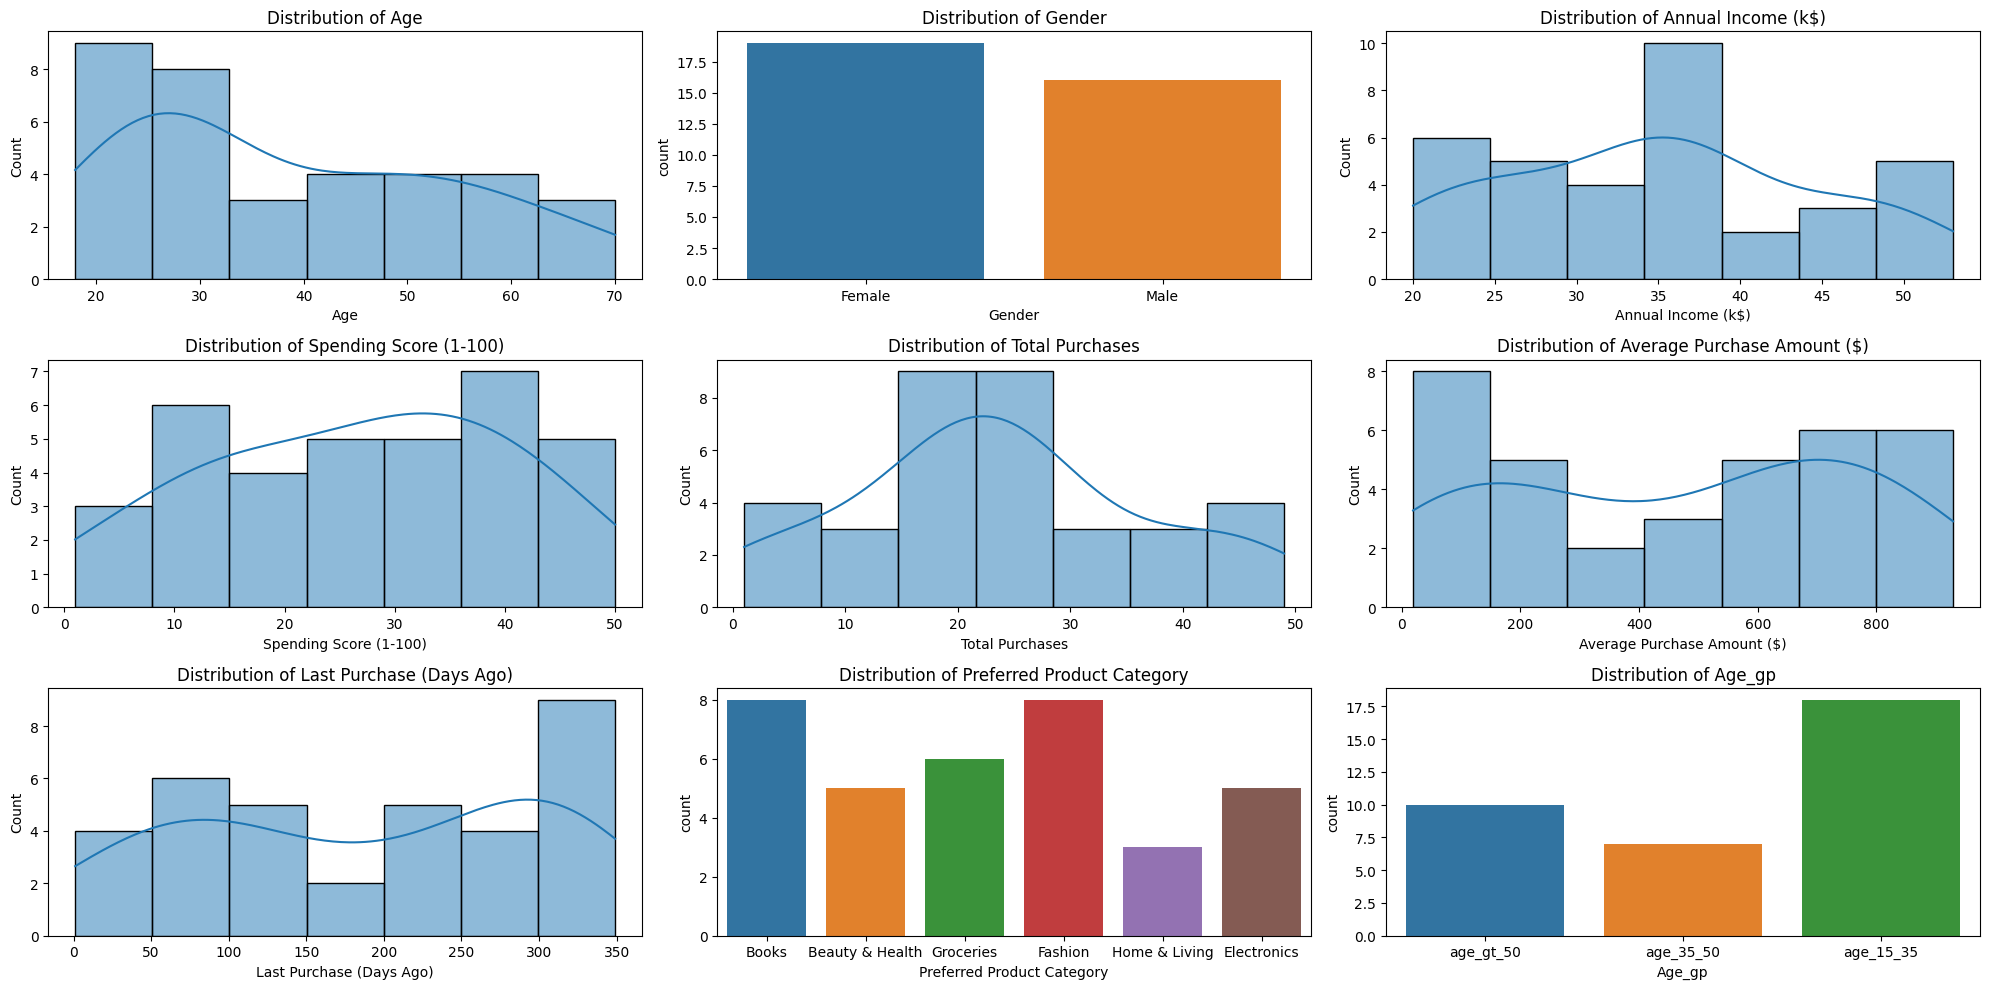

In [1925]:

dftemp = df[df['anninc_label']==5].drop('anninc_label',axis=1,inplace=False)
print(dftemp.shape)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

axes = axes.flatten()

for i, column in enumerate(dftemp.columns):
    if column != 'anninc_label' and column != 'Preferred Product Category' and column != 'Gender' and column!='Age_gp':
        sns.histplot(data=dftemp[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
    else:
        sns.countplot(data=dftemp, x=column, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


In [1926]:
dftemp.describe()

,Age,Annual Income (k$),Spending Score (1-100),Total Purchases,Average Purchase Amount ($),Last Purchase (Days Ago)
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,38.828571,34.914286,26.742857,23.628571,471.342857,186.885714
std,15.761990,9.647833,13.935445,13.117312,301.698812,114.106960
min,18.000000,20.000000,1.000000,1.000000,19.000000,1.000000
25%,25.500000,26.500000,16.000000,16.500000,203.500000,84.000000
50%,34.000000,35.000000,28.000000,23.000000,534.000000,211.000000
75%,52.000000,41.000000,37.500000,30.000000,732.500000,301.000000
max,70.000000,53.000000,50.000000,49.000000,929.000000,349.000000


- #### 17.5% customers belongs to the cluster 6.
- #### In the sixth cluster Annual Income ranges from 20-53k and spending score ranges from 1-50.
- #### 50% of the customers are under 34 years of age.
- #### Books and Fashion products are most preferred by the customers.

## Purchase Frequency according to last purchase and Spending Score

In [1927]:
df.drop('anninc_label',axis=1,inplace=True)

c:\Users\farzi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\farzi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\farzi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\farzi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\

c:\Users\farzi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\farzi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\farzi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\farzi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\

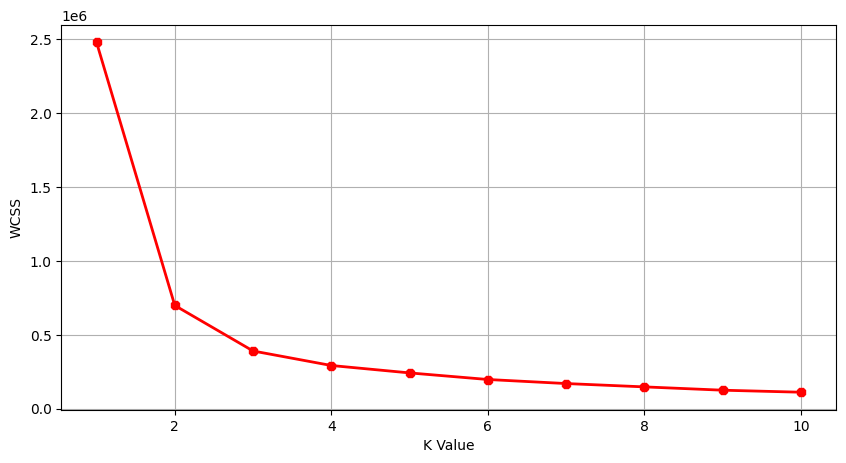

In [1928]:

x1=df.loc[:,['Last Purchase (Days Ago)','Spending Score (1-100)']].values
ce=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x1)
    ce.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(1,11),ce,linewidth=2,color='red',marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

c:\Users\farzi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


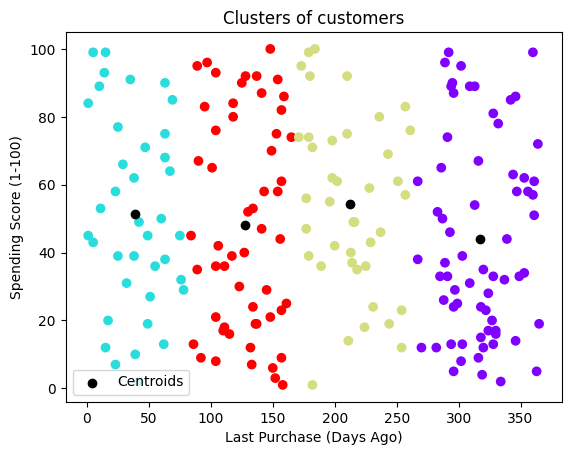

In [1929]:
kmeans=KMeans(n_clusters=4,random_state=42)
label = kmeans.fit_predict(x1)
# Choose a specific cluster you want to analyze (e.g., cluster 0)
cluster_to_analyze = 0
centroids=kmeans.cluster_centers_
# centroids
plt.scatter(x1[:,0],x1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(centroids[:,0],centroids[:,1],c='black',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Last Purchase (Days Ago)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

- Segmented to 4 clusters

In [1930]:
df['purch_freq'] = label

### cluster 1

(67, 9)


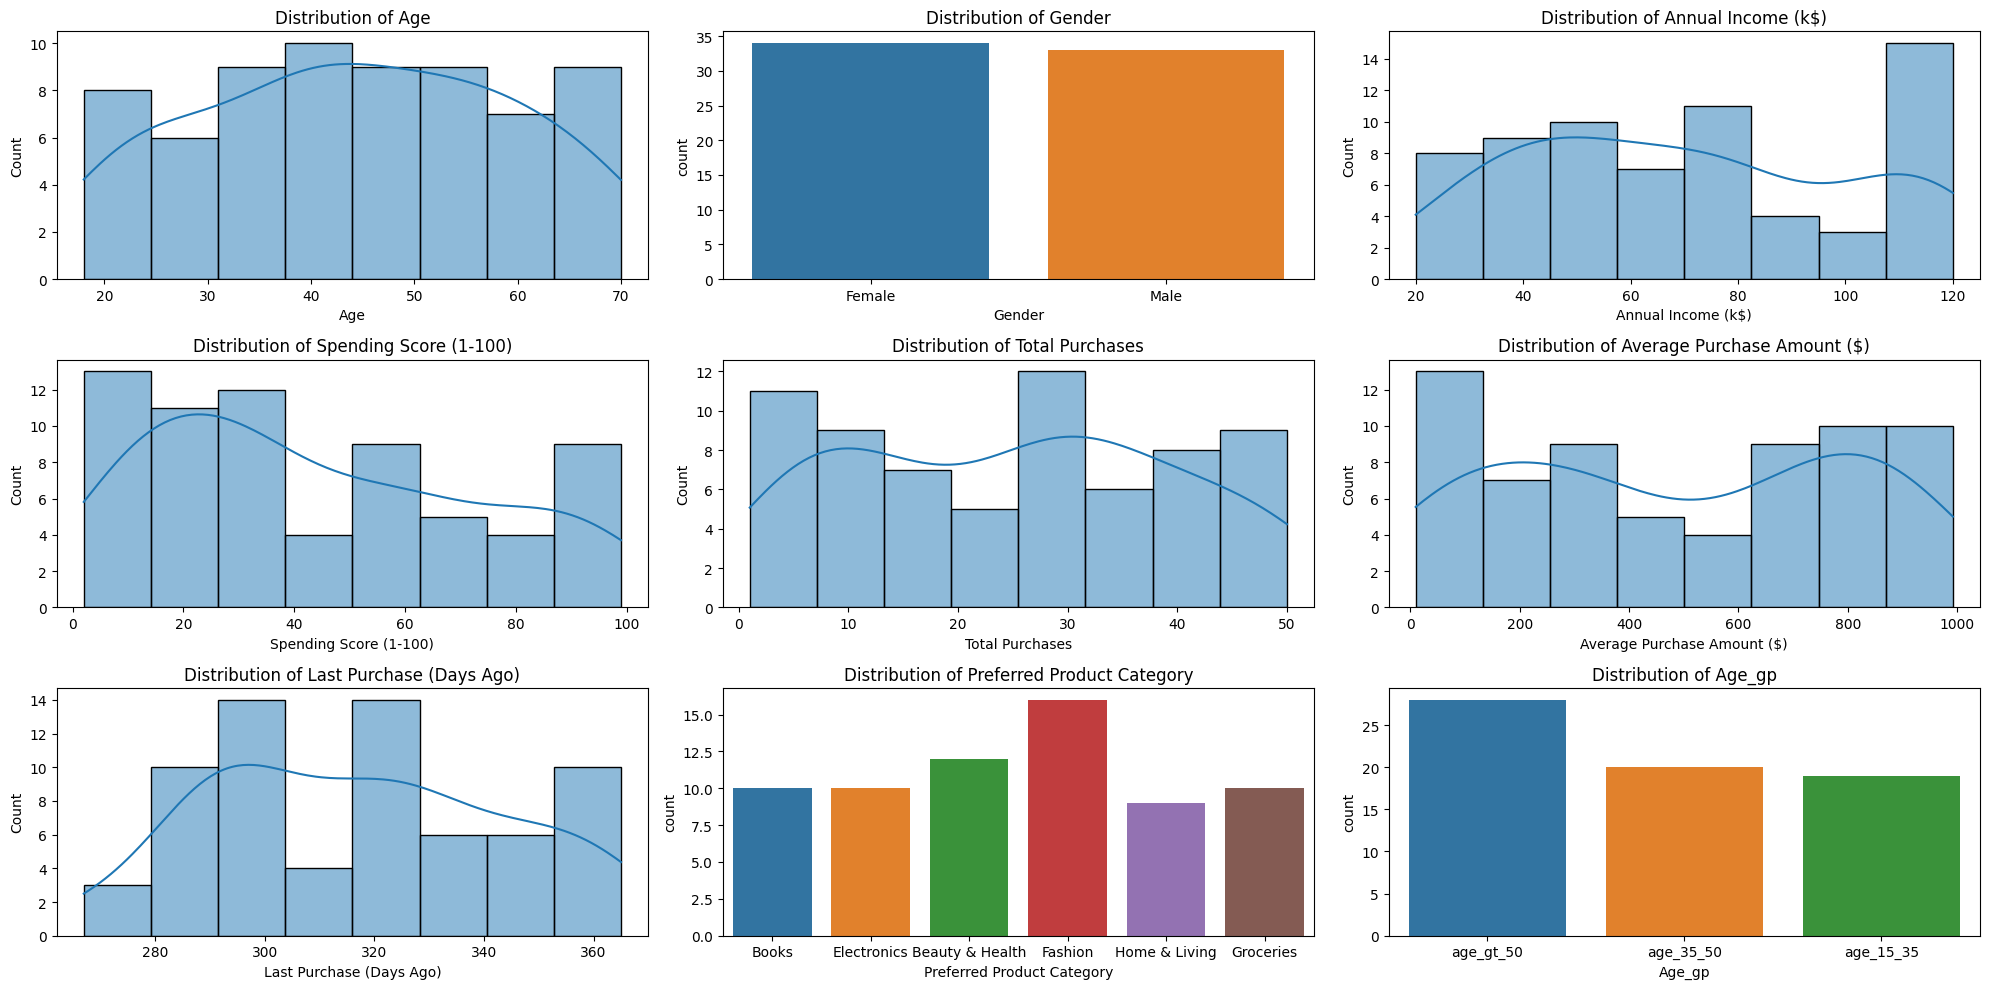

In [1931]:

dftemp = df[df['purch_freq']==0].drop('purch_freq',axis=1,inplace=False)
print(dftemp.shape)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

axes = axes.flatten()

for i, column in enumerate(dftemp.columns):
    if column != 'purch_freq' and column != 'Preferred Product Category'and column != 'Gender' and column!='Age_gp':
        sns.histplot(data=dftemp[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
    else:
        sns.countplot(data=dftemp, x=column, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


In [1932]:
67/200

0.335

In [1933]:
dftemp.describe()

,Age,Annual Income (k$),Spending Score (1-100),Total Purchases,Average Purchase Amount ($),Last Purchase (Days Ago)
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,44.283582,70.432836,43.895522,24.880597,491.955224,317.328358
std,15.169553,30.607597,29.039229,14.923565,319.510015,26.866893
min,18.000000,20.000000,2.000000,1.000000,10.000000,267.000000
25%,32.500000,44.500000,18.000000,11.500000,207.000000,294.500000
50%,44.000000,69.000000,35.000000,27.000000,483.000000,318.000000
75%,56.000000,100.000000,64.000000,37.500000,789.500000,338.000000
max,70.000000,120.000000,99.000000,50.000000,992.000000,365.000000


- #### 33.5% customers belongs to the cluster 1.
- #### In the first cluster Purchase Frequency according to last purchase ranges from 267-365 days and spending score ranges from 2-99.
- #### 50% of the customers are under 44 years of age.
- #### Fashion and Beauty&Health products are most preferred by the customers.

### cluster 2

(38, 9)


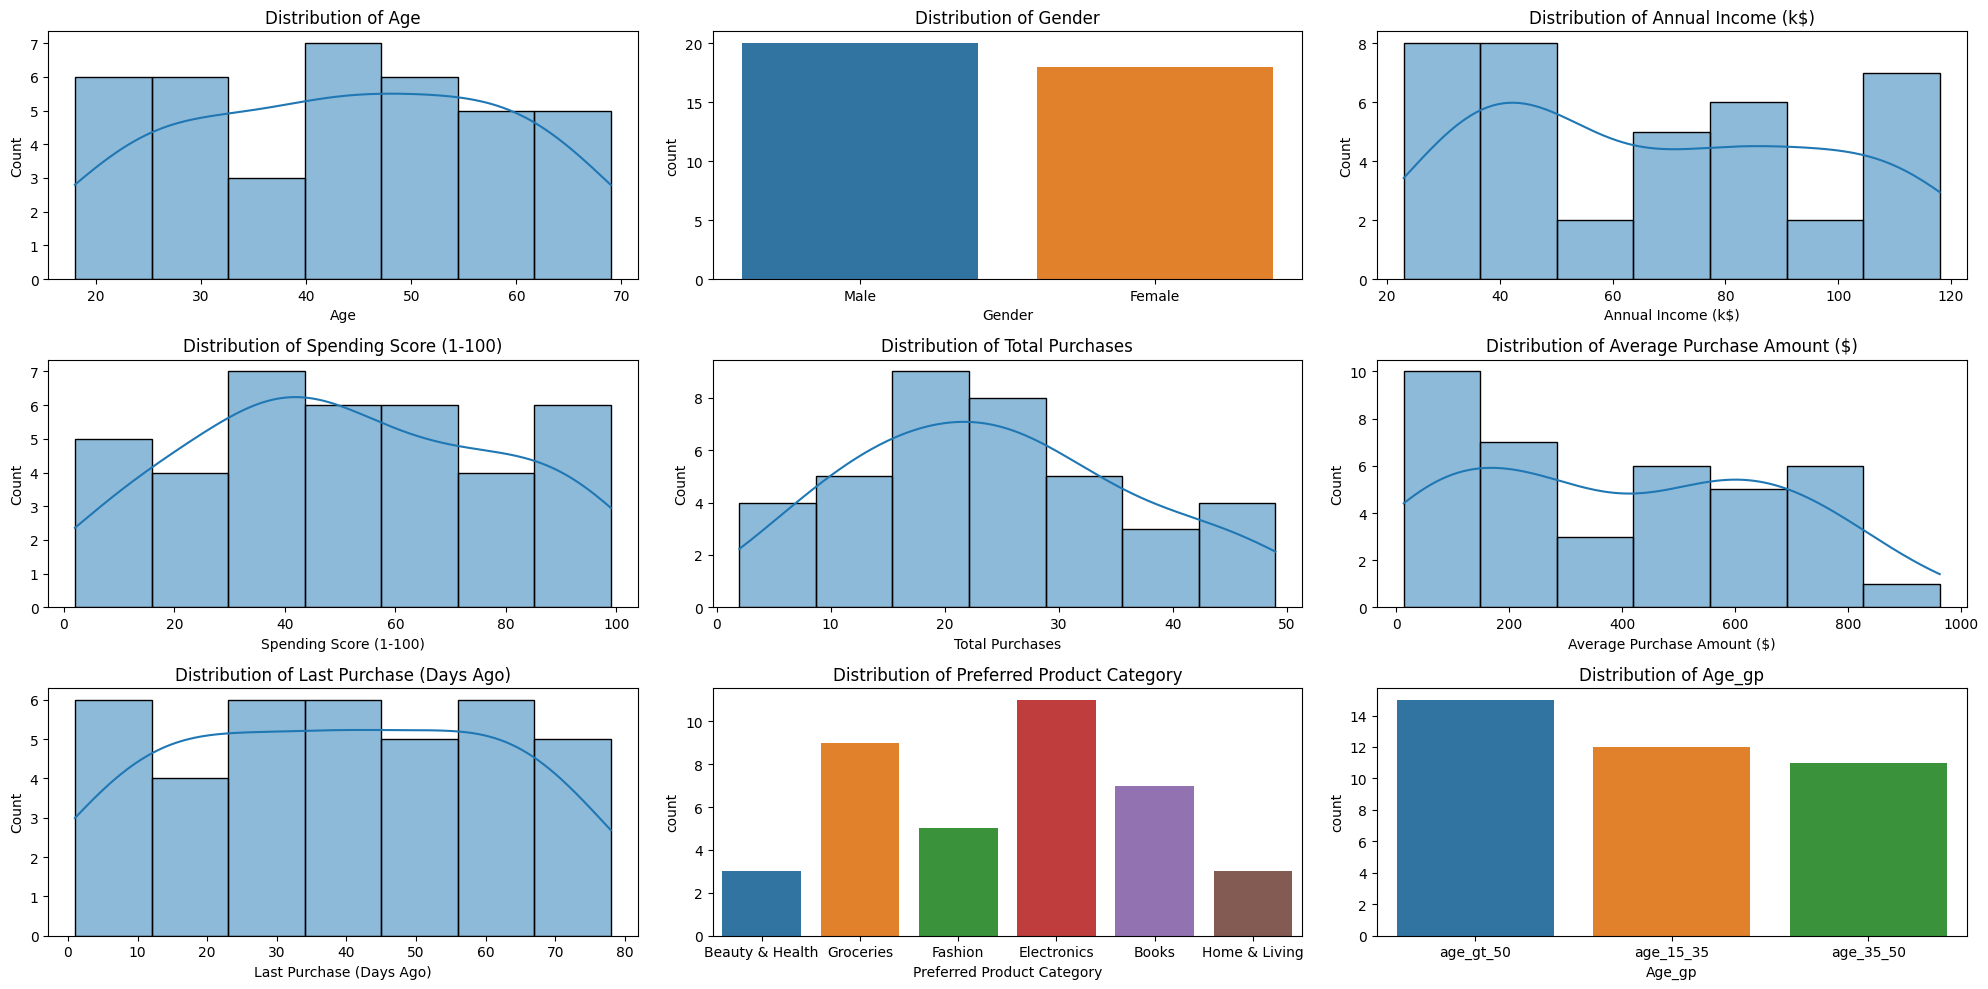

In [1934]:

dftemp = df[df['purch_freq']==1].drop('purch_freq',axis=1,inplace=False)
print(dftemp.shape)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

axes = axes.flatten()

for i, column in enumerate(dftemp.columns):
    if column != 'purch_freq' and column != 'Preferred Product Category'and column != 'Gender' and column!='Age_gp':
        sns.histplot(data=dftemp[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
    else:
        sns.countplot(data=dftemp, x=column, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


In [1935]:
38/200

0.19

In [1936]:
dftemp.describe()

,Age,Annual Income (k$),Spending Score (1-100),Total Purchases,Average Purchase Amount ($),Last Purchase (Days Ago)
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,43.684211,68.052632,51.447368,24.447368,400.605263,38.815789
std,15.290176,29.811976,28.155646,12.592785,277.215063,23.238895
min,18.000000,23.000000,2.000000,2.000000,13.000000,1.000000
25%,31.250000,41.500000,31.250000,16.250000,136.750000,18.500000
50%,43.500000,67.000000,47.000000,24.000000,352.500000,38.500000
75%,54.750000,88.750000,74.000000,32.750000,629.500000,61.500000
max,69.000000,118.000000,99.000000,49.000000,962.000000,78.000000


- #### 19% customers belongs to the cluster 2.
- #### In the second cluster Purchase Frequency according to last purchase ranges from 1-78 days and spending score ranges from 2-99.
- #### 50% of the customers are under 43 years of age.
- #### Electronics and Groceries products are most preferred by the customers.

### cluster 3

(40, 9)


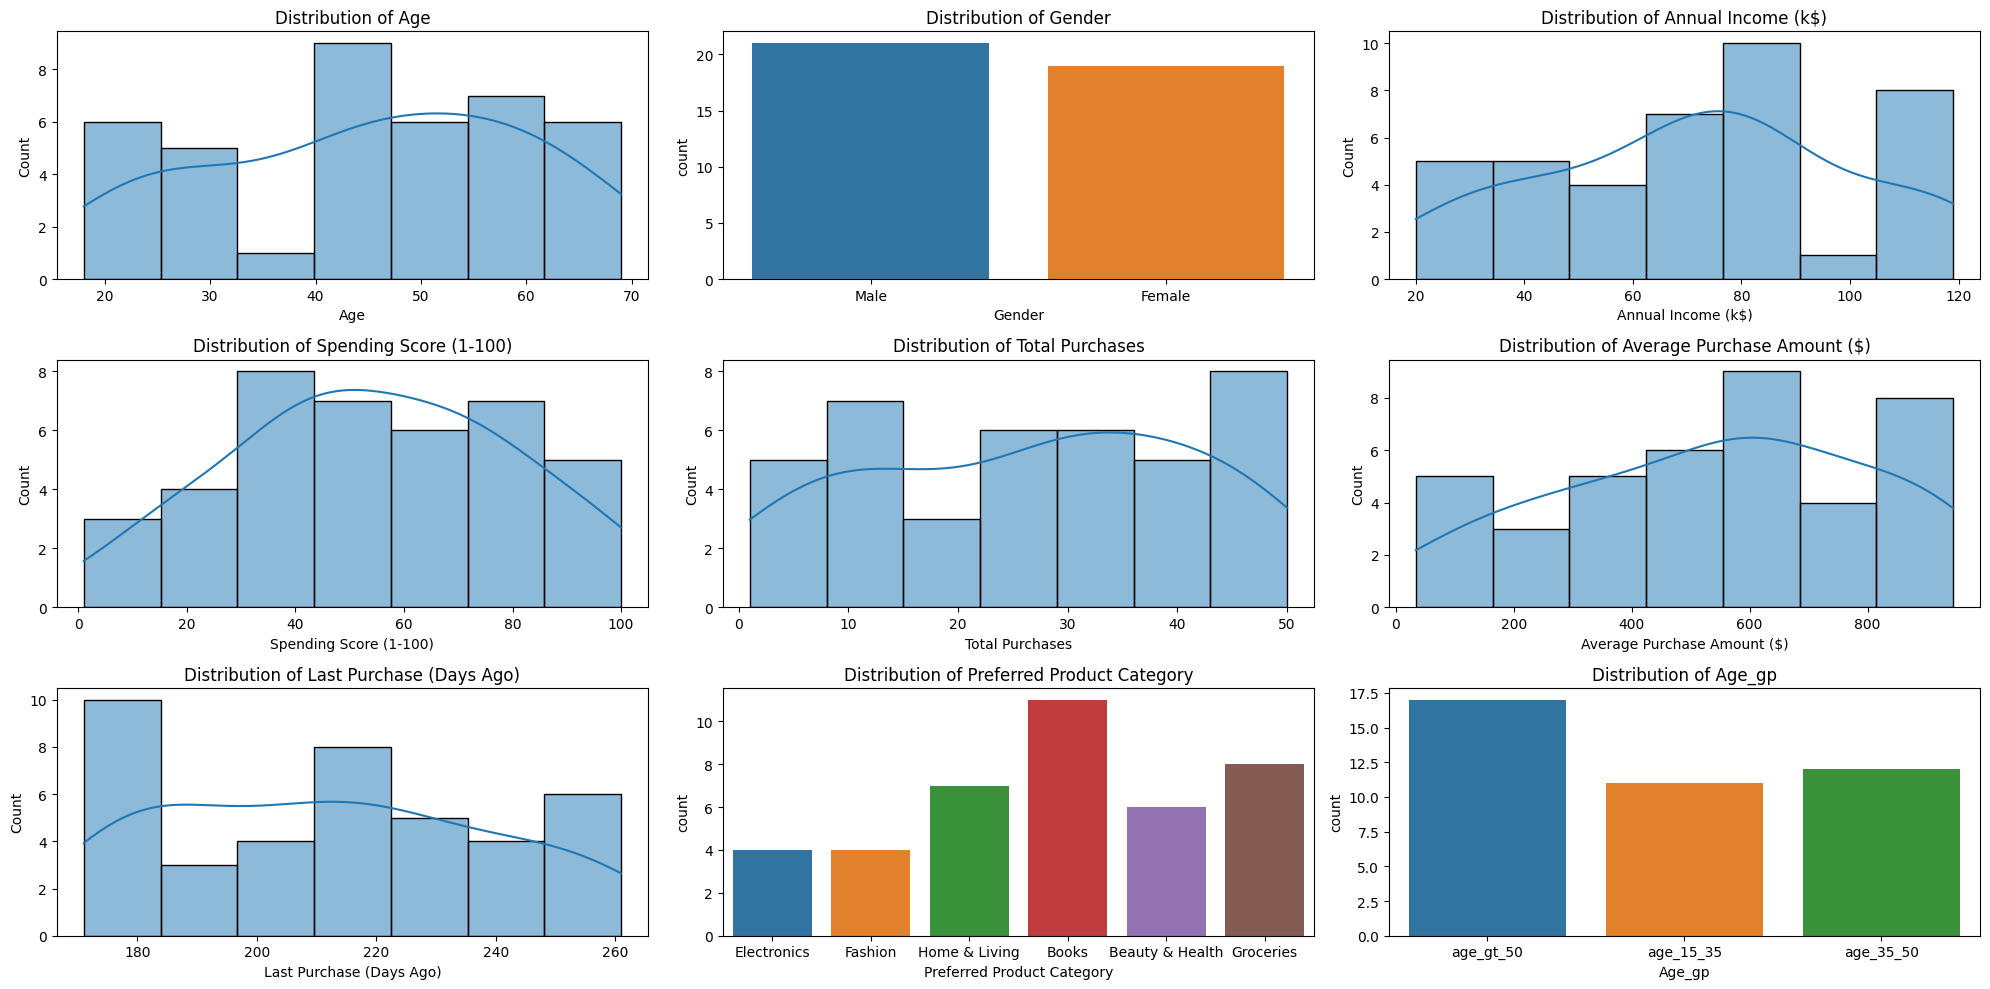

In [1937]:

dftemp = df[df['purch_freq']==2].drop('purch_freq',axis=1,inplace=False)
print(dftemp.shape)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

axes = axes.flatten()

for i, column in enumerate(dftemp.columns):
    if column != 'purch_freq' and column != 'Preferred Product Category'and column != 'Gender' and column!='Age_gp':
        sns.histplot(data=dftemp[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
    else:
        sns.countplot(data=dftemp, x=column, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


In [1938]:
40/200

0.2

In [1939]:
dftemp.describe()

,Age,Annual Income (k$),Spending Score (1-100),Total Purchases,Average Purchase Amount ($),Last Purchase (Days Ago)
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,45.125000,72.075000,54.350000,26.525000,543.650000,212.100000
std,15.344234,29.003437,25.683028,15.196132,268.688701,27.701523
min,18.000000,20.000000,1.000000,1.000000,34.000000,171.000000
25%,31.500000,50.250000,36.750000,12.500000,335.750000,183.500000
50%,46.000000,76.000000,55.500000,27.500000,563.500000,212.000000
75%,57.250000,88.000000,74.000000,37.750000,739.500000,232.250000
max,69.000000,119.000000,100.000000,50.000000,945.000000,261.000000


- #### 20% customers belongs to the cluster 3.
- #### In the third cluster Purchase Frequency according to last purchase ranges from 171-261 days and spending score ranges from 1-100.
- #### 50% of the customers are under 46 years of age.
- #### Books and Groceries products are most preferred by the customers.

### cluster 4

(55, 9)


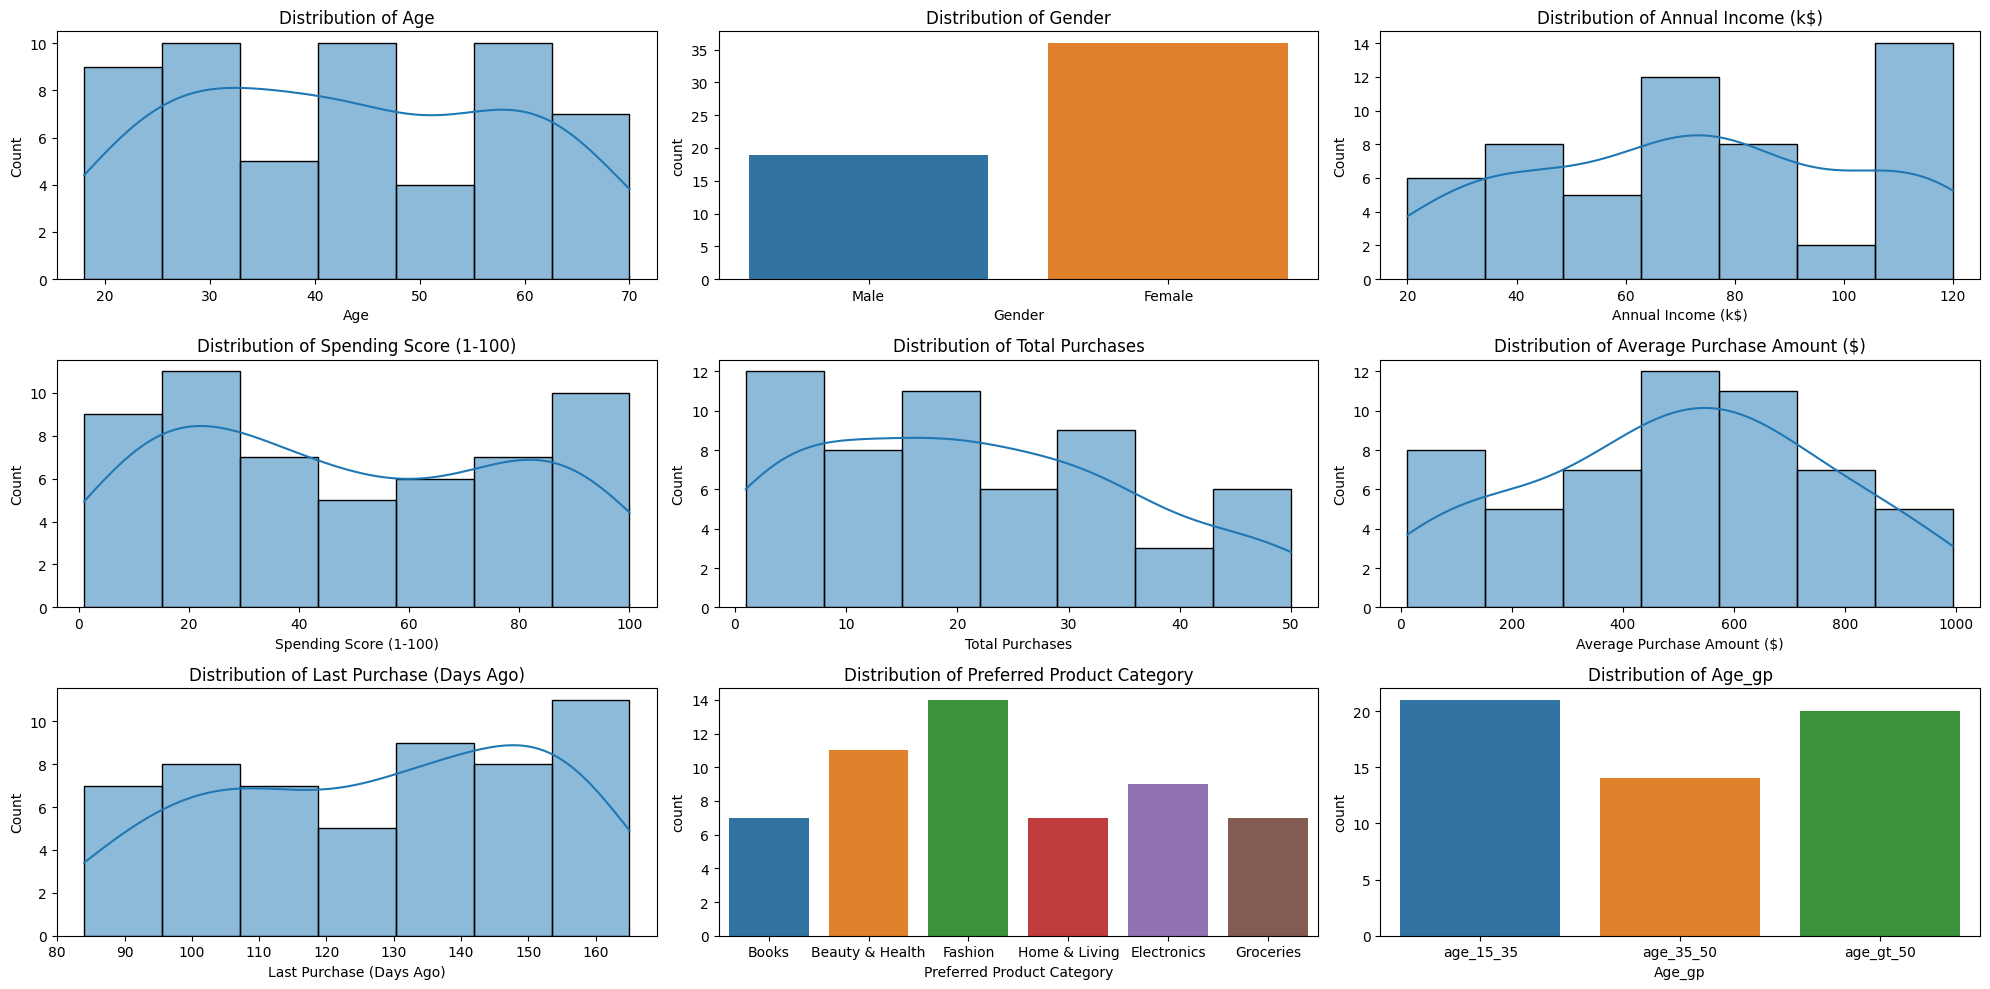

In [1940]:

dftemp = df[df['purch_freq']==3].drop('purch_freq',axis=1,inplace=False)
print(dftemp.shape)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

axes = axes.flatten()

for i, column in enumerate(dftemp.columns):
    if column != 'purch_freq' and column != 'Preferred Product Category'and column != 'Gender' and column!='Age_gp':
        sns.histplot(data=dftemp[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
    else:
        sns.countplot(data=dftemp, x=column, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


In [1941]:
55/200

0.275

In [1942]:
dftemp.describe()

,Age,Annual Income (k$),Spending Score (1-100),Total Purchases,Average Purchase Amount ($),Last Purchase (Days Ago)
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,43.090909,73.072727,48.254545,21.418182,500.327273,127.818182
std,15.523307,30.751004,31.052058,14.453874,269.487240,23.956048
min,18.000000,20.000000,1.000000,1.000000,12.000000,84.000000
25%,31.000000,47.000000,20.000000,9.000000,319.500000,105.000000
50%,42.000000,72.000000,44.000000,21.000000,515.000000,132.000000
75%,57.000000,101.500000,78.000000,32.500000,677.500000,149.500000
max,70.000000,120.000000,100.000000,50.000000,994.000000,165.000000


- #### 27.5% customers belongs to the cluster 4.
- #### In the fourth cluster Purchase Frequency according to last purchase ranges from 84-165 days and spending score ranges from 1-100.
- #### 50% of the customers are under 42 years of age.
- #### Fashion and Beauty&Health products are most preferred by the customers.

## Clustering on the basis of Annual Income, Spending Score and Purchase Frequency according to last purchase

c:\Users\farzi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\farzi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\farzi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\farzi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\

c:\Users\farzi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


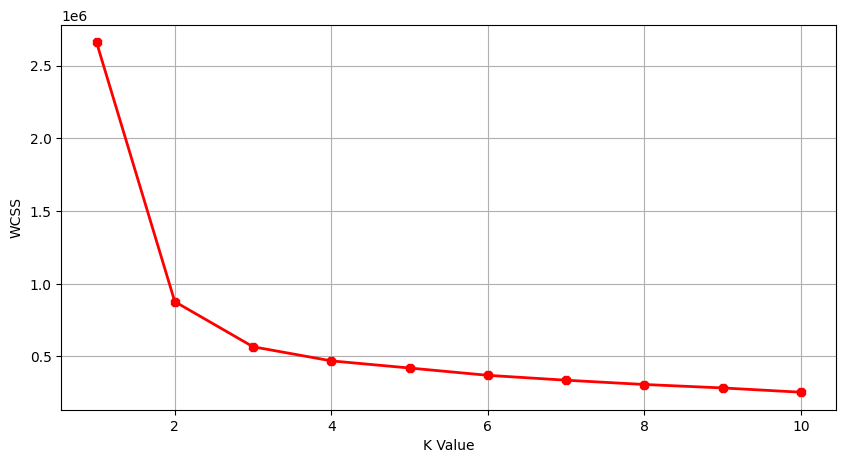

In [1943]:
df.drop('purch_freq',axis=1,inplace=True)
x1=df.loc[:,['Annual Income (k$)','Spending Score (1-100)','Last Purchase (Days Ago)']].values
ce=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x1)
    ce.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(1,11),ce,linewidth=2,color='red',marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [1944]:
kmeans=KMeans(n_clusters=4,random_state=42)
labels = kmeans.fit_predict(x1)
# Choose a specific cluster you want to analyze (e.g., cluster 0)
cluster_to_analyze = 0
centroids=kmeans.cluster_centers_



c:\Users\farzi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [1945]:
df['label'] = labels

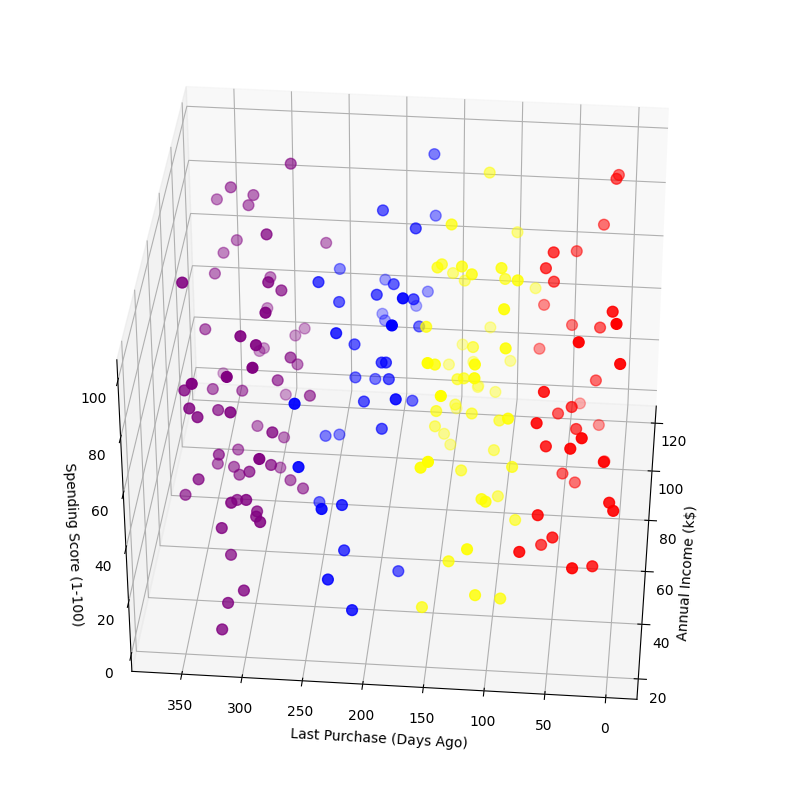

In [1946]:

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[df.label == 0]["Annual Income (k$)"],df[df.label == 0]['Last Purchase (Days Ago)'], df[df.label == 0]["Spending Score (1-100)"], c='purple', s=60)
ax.scatter (df[df.label == 1]["Annual Income (k$)"],df[df.label == 1]['Last Purchase (Days Ago)'], df[df.label == 1]["Spending Score (1-100)"], c='red', s=60)
ax.scatter(df[df.label == 2]["Annual Income (k$)"],df[df.label == 2]['Last Purchase (Days Ago)'], df[df.label == 2]["Spending Score (1-100)"], c='blue', s=60)
ax.scatter(df[df.label == 3]["Annual Income (k$)"],df[df.label == 3]['Last Purchase (Days Ago)'], df[df.label == 3]["Spending Score (1-100)"], c='yellow', s=60)
ax.view_init(35, 185)

plt.xlabel("Annual Income (k$)")
plt.ylabel('Last Purchase (Days Ago)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

### cluster 1 - Occasional Shoppers

(67, 9)


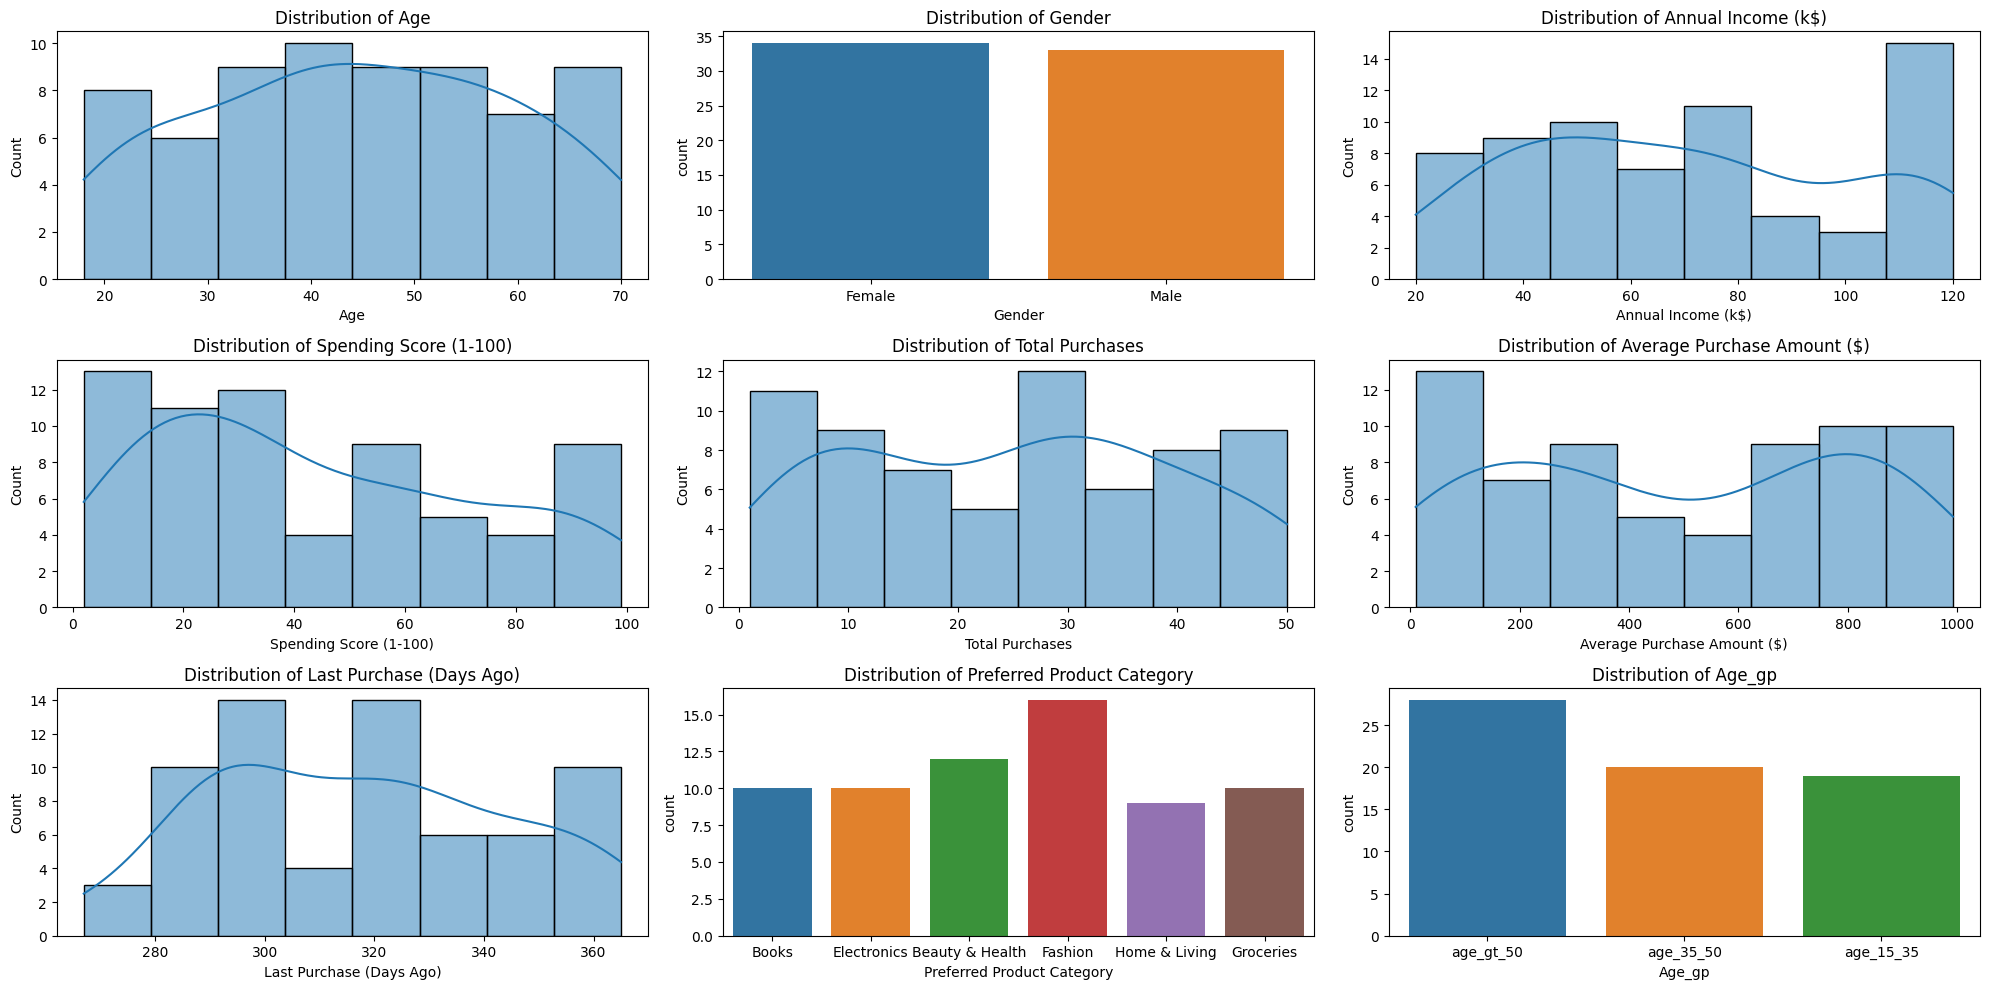

In [1947]:

dftemp = df[df['label']==0].drop('label',axis=1,inplace=False)
print(dftemp.shape)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

axes = axes.flatten()

for i, column in enumerate(dftemp.columns):
    if column != 'label' and column != 'Preferred Product Category'and column != 'Gender' and column!='Age_gp':
        sns.histplot(data=dftemp[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
    else:
        sns.countplot(data=dftemp, x=column, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


In [1948]:
67/200

0.335

In [1949]:
dftemp.describe()

,Age,Annual Income (k$),Spending Score (1-100),Total Purchases,Average Purchase Amount ($),Last Purchase (Days Ago)
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,44.283582,70.432836,43.895522,24.880597,491.955224,317.328358
std,15.169553,30.607597,29.039229,14.923565,319.510015,26.866893
min,18.000000,20.000000,2.000000,1.000000,10.000000,267.000000
25%,32.500000,44.500000,18.000000,11.500000,207.000000,294.500000
50%,44.000000,69.000000,35.000000,27.000000,483.000000,318.000000
75%,56.000000,100.000000,64.000000,37.500000,789.500000,338.000000
max,70.000000,120.000000,99.000000,50.000000,992.000000,365.000000


- #### 33.5% customers belongs to the cluster 1.
- #### In the first cluster Annual Income ranges from 20-120, spending score ranges from 2-99 and Purchase Frequency according to last purchase ranges from 267-365 days.
- #### 50% of the customers are under 44 years of age.
- #### Fashion and Beauty&Health products are most preferred by the customers.

### cluster 2 - Frequent Repeat Shoppers

(38, 9)


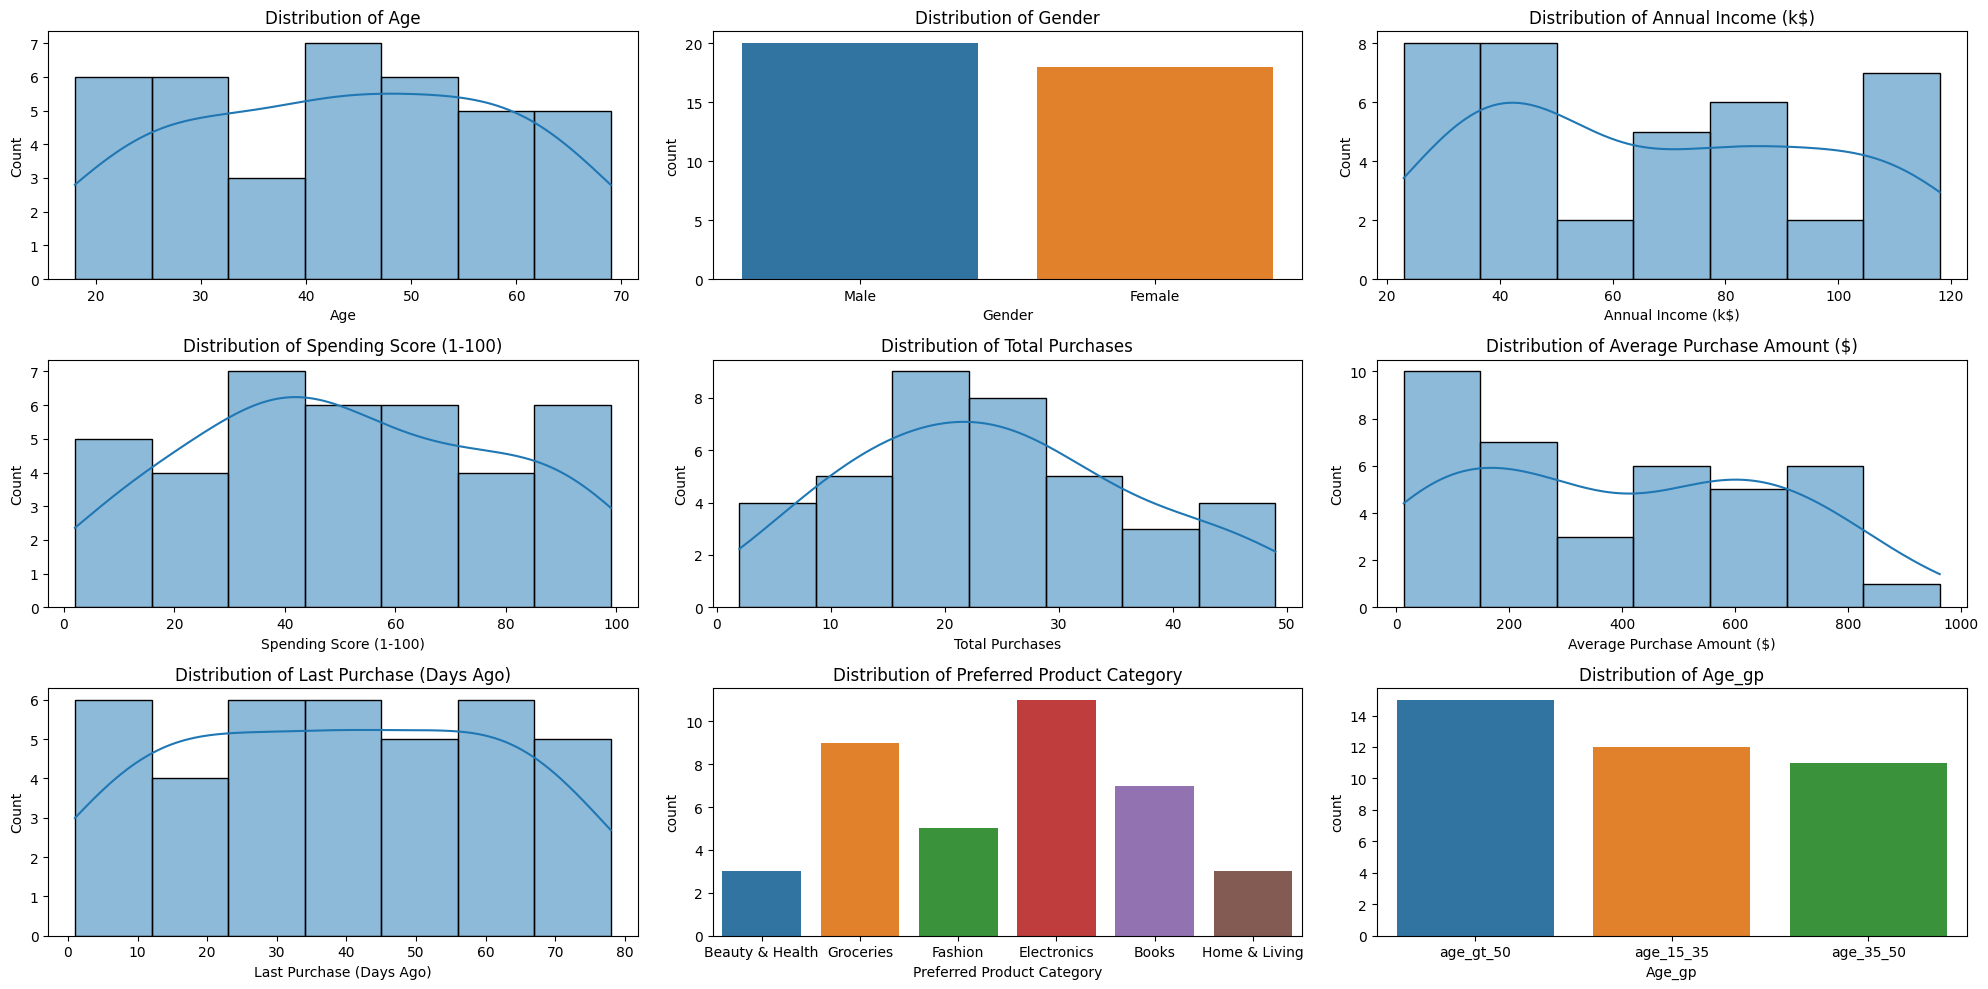

In [1950]:

dftemp = df[df['label']==1].drop('label',axis=1,inplace=False)
print(dftemp.shape)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

axes = axes.flatten()

for i, column in enumerate(dftemp.columns):
    if column != 'label' and column != 'Preferred Product Category'and column != 'Gender' and column!='Age_gp':
        sns.histplot(data=dftemp[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
    else:
        sns.countplot(data=dftemp, x=column, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


In [1951]:
38/200

0.19

In [1952]:
dftemp.describe()

,Age,Annual Income (k$),Spending Score (1-100),Total Purchases,Average Purchase Amount ($),Last Purchase (Days Ago)
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,43.684211,68.052632,51.447368,24.447368,400.605263,38.815789
std,15.290176,29.811976,28.155646,12.592785,277.215063,23.238895
min,18.000000,23.000000,2.000000,2.000000,13.000000,1.000000
25%,31.250000,41.500000,31.250000,16.250000,136.750000,18.500000
50%,43.500000,67.000000,47.000000,24.000000,352.500000,38.500000
75%,54.750000,88.750000,74.000000,32.750000,629.500000,61.500000
max,69.000000,118.000000,99.000000,49.000000,962.000000,78.000000


- #### 19% customers belongs to the cluster 2.
- #### In the second cluster Annual Income ranges from 23-118k, spending score ranges from 2-99 and Purchase Frequency according to last purchase ranges from 1-78 days.
- #### 50% of the customers are under 43 years of age.
- #### Electronics and Groceries products are most preferred by the customers.

### Cluster 3 - Semi-Regular Repeat Shoppers

(40, 9)


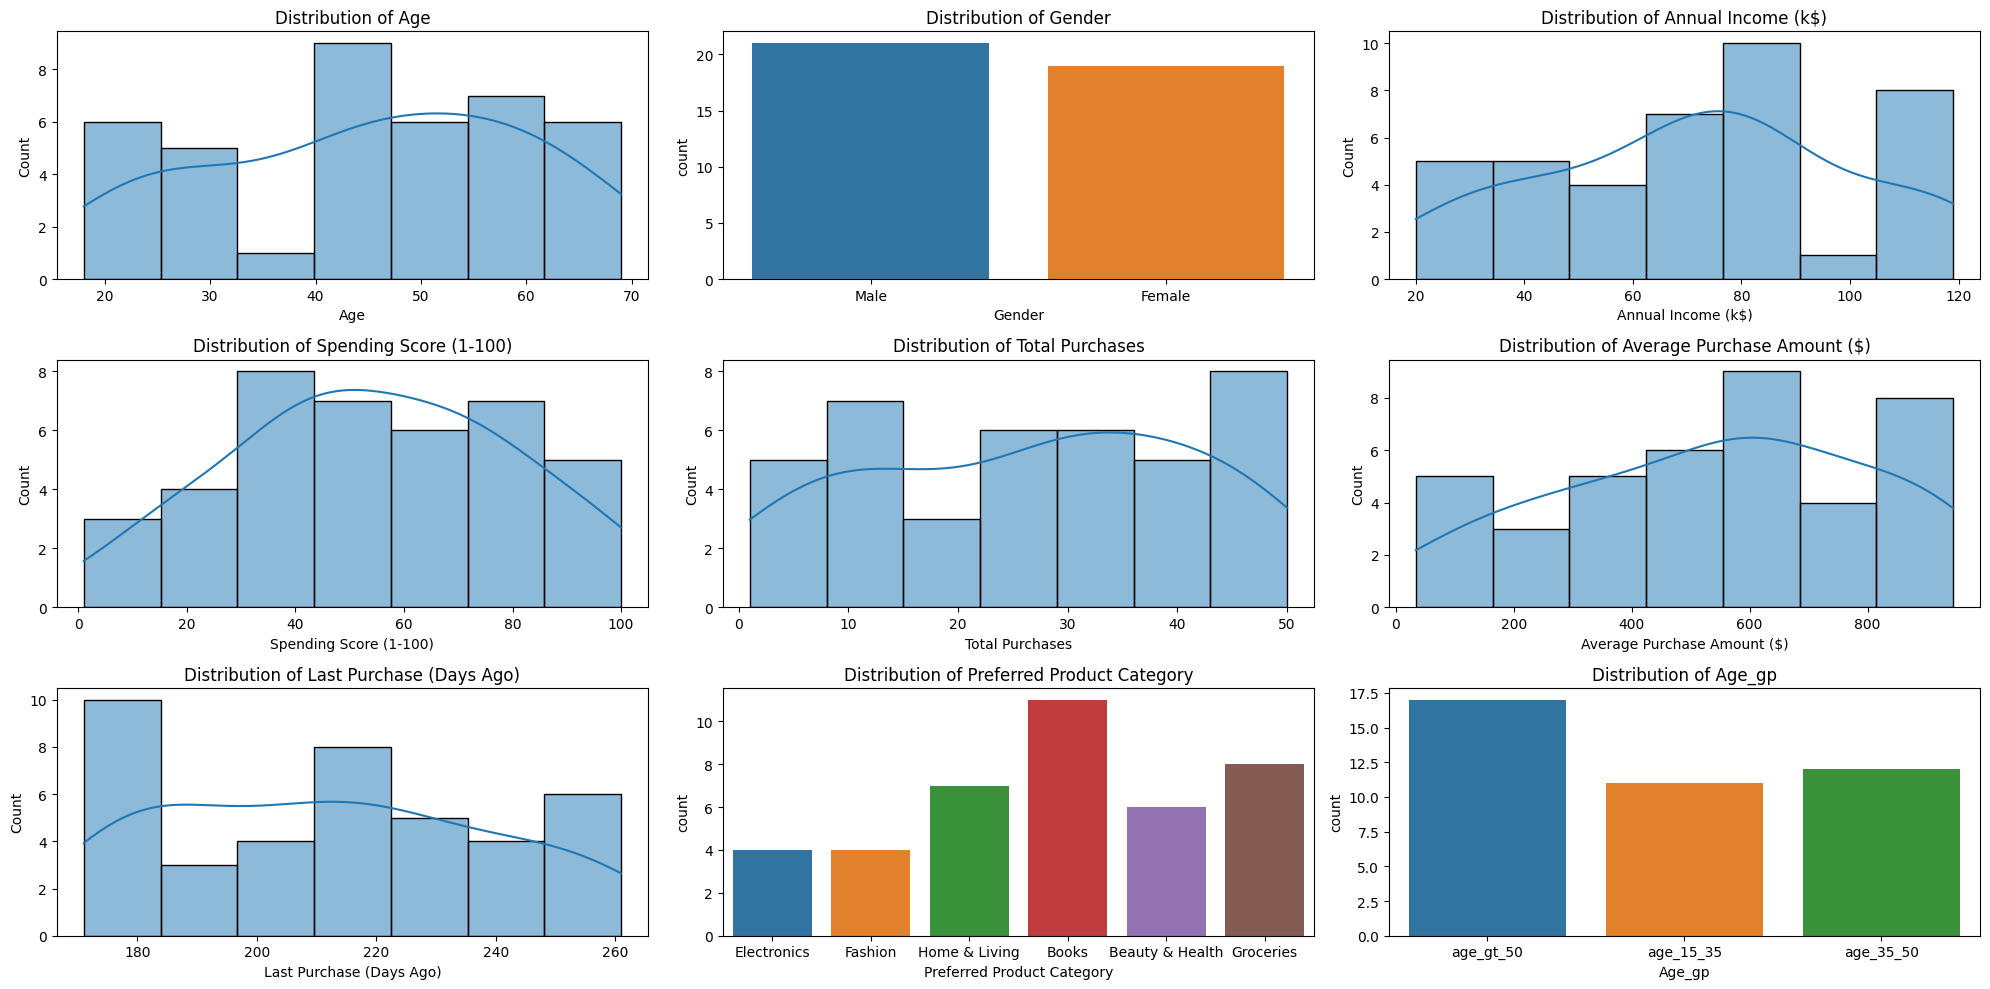

In [1953]:

dftemp = df[df['label']==2].drop('label',axis=1,inplace=False)
print(dftemp.shape)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

axes = axes.flatten()

for i, column in enumerate(dftemp.columns):
    if column != 'label' and column != 'Preferred Product Category'and column != 'Gender' and column!='Age_gp':
        sns.histplot(data=dftemp[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
    else:
        sns.countplot(data=dftemp, x=column, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


In [1954]:
40/200

0.2

In [1955]:
dftemp.describe()

,Age,Annual Income (k$),Spending Score (1-100),Total Purchases,Average Purchase Amount ($),Last Purchase (Days Ago)
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,45.125000,72.075000,54.350000,26.525000,543.650000,212.100000
std,15.344234,29.003437,25.683028,15.196132,268.688701,27.701523
min,18.000000,20.000000,1.000000,1.000000,34.000000,171.000000
25%,31.500000,50.250000,36.750000,12.500000,335.750000,183.500000
50%,46.000000,76.000000,55.500000,27.500000,563.500000,212.000000
75%,57.250000,88.000000,74.000000,37.750000,739.500000,232.250000
max,69.000000,119.000000,100.000000,50.000000,945.000000,261.000000


- #### 20% customers belongs to the cluster 3.
- #### In the third cluster Annual Income ranges from 20-119k, spending score ranges from 1-100 and Purchase Frequency according to last purchase ranges from 171-261 days.
- #### 50% of the customers are under 46 years of age.
- #### Books and Groceries products are most preferred by the customers.

### cluster 4 - Moderate Repeat Shoppers

(55, 9)


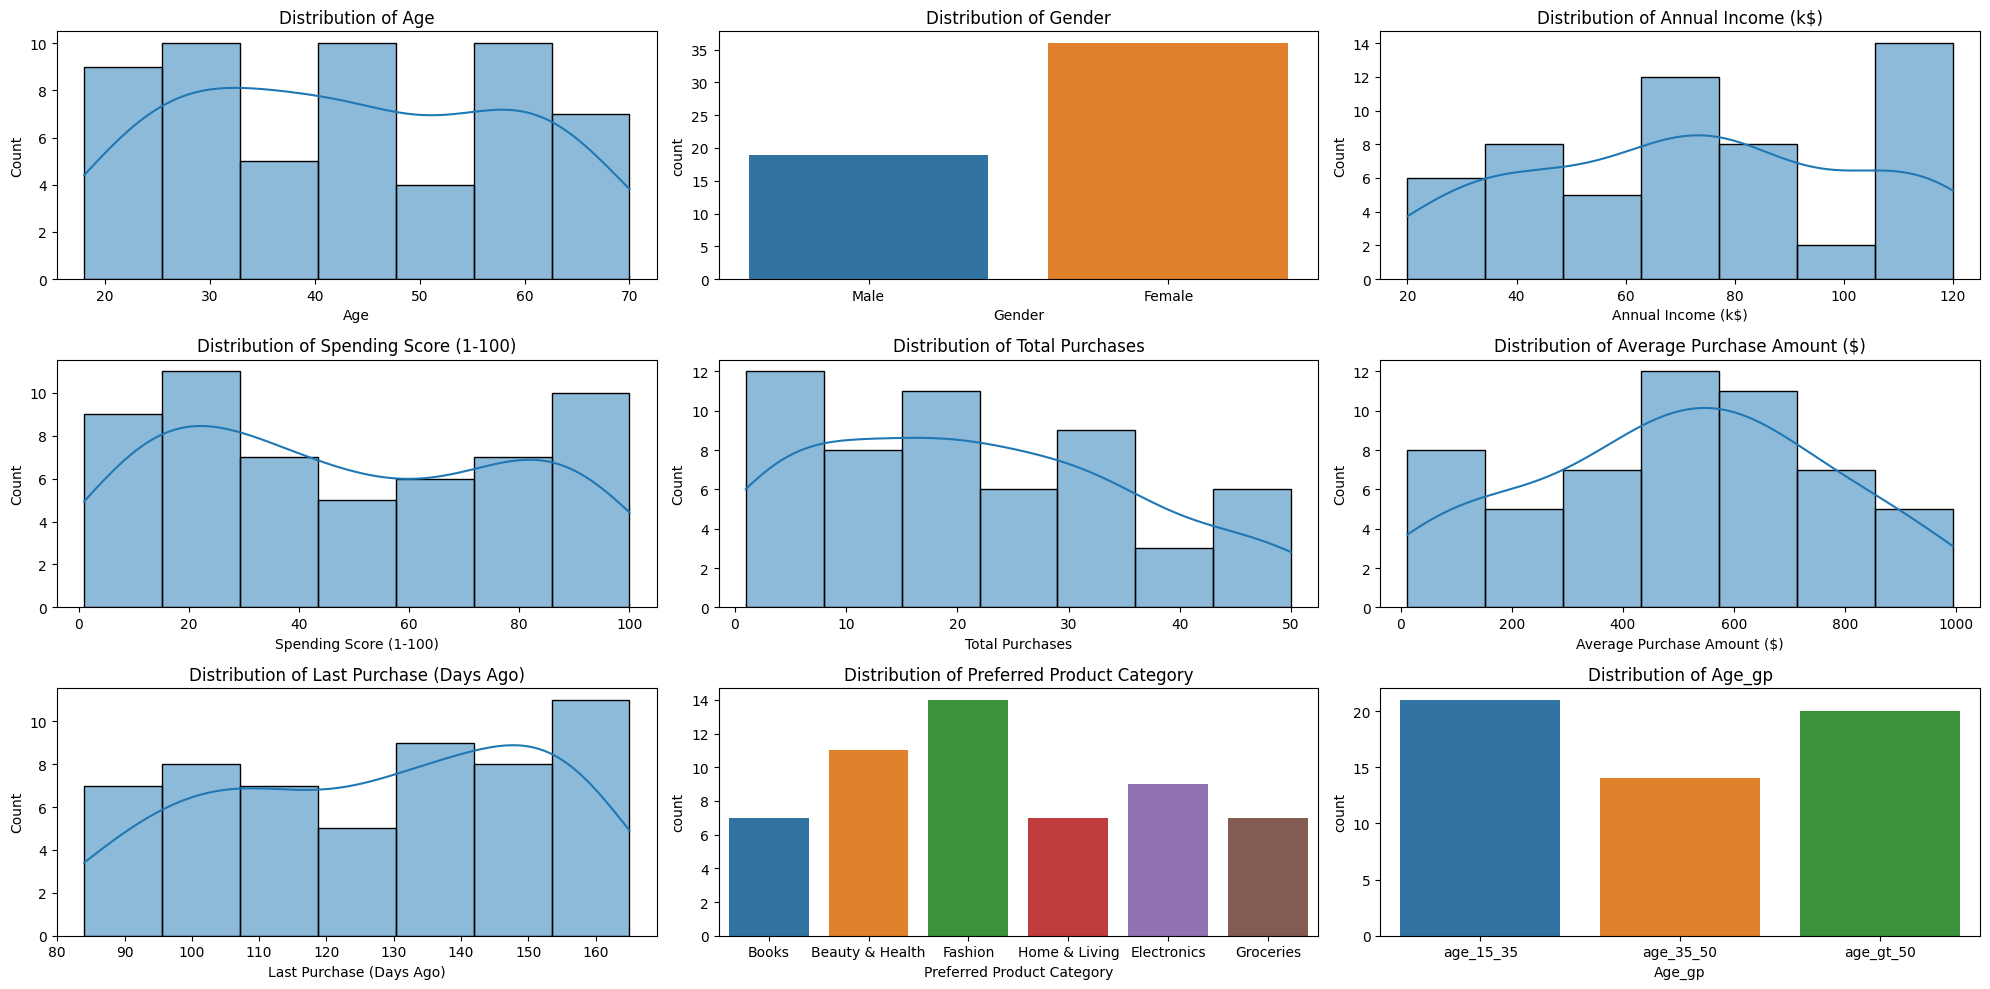

In [1956]:

dftemp = df[df['label']==3].drop('label',axis=1,inplace=False)
print(dftemp.shape)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

axes = axes.flatten()

for i, column in enumerate(dftemp.columns):
    if column != 'label' and column != 'Preferred Product Category'and column != 'Gender' and column!='Age_gp':
        sns.histplot(data=dftemp[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
    else:
        sns.countplot(data=dftemp, x=column, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


In [1957]:
55/200

0.275

In [1958]:
dftemp.describe()

,Age,Annual Income (k$),Spending Score (1-100),Total Purchases,Average Purchase Amount ($),Last Purchase (Days Ago)
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,43.090909,73.072727,48.254545,21.418182,500.327273,127.818182
std,15.523307,30.751004,31.052058,14.453874,269.487240,23.956048
min,18.000000,20.000000,1.000000,1.000000,12.000000,84.000000
25%,31.000000,47.000000,20.000000,9.000000,319.500000,105.000000
50%,42.000000,72.000000,44.000000,21.000000,515.000000,132.000000
75%,57.000000,101.500000,78.000000,32.500000,677.500000,149.500000
max,70.000000,120.000000,100.000000,50.000000,994.000000,165.000000


- #### 27.5% customers belongs to the cluster 4.
- #### In the fourth cluster Annual Income ranges from 20-120k, spending score ranges from 1-100 and Purchase Frequency according to last purchase ranges from 84-165 days.
- #### 50% of the customers are under 42 years of age.
- #### Fashion and Beauty&Health products are most preferred by the customers.

## Marketing Strategies

1. #### Frequent Repeat Shoppers (1-78 days):

- Loyalty Programs: Implement and promote a loyalty program that rewards frequent repeat shoppers with discounts, exclusive offers, or points-based rewards for every purchase.

- Regular Communication: Maintain regular communication with this segment through email marketing, SMS, or app notifications to keep them engaged and informed about new products, promotions, and updates.

- Personalization: Use customer data and purchase history to provide personalized product recommendations and offers to encourage more frequent purchases.

2. #### Moderate Repeat Shoppers (84-165 days):

- Reactivation Campaigns: Launch reactivation campaigns targeting this segment to encourage them to return for another purchase. Offer special incentives or discounts for returning customers.

- Email Reminders: Send friendly email reminders or notifications to remind them of their previous purchase and introduce them to new products or promotions.

- Subscription Services: Introduce subscription services or product bundles that encourage customers to make purchases at regular intervals.

3. #### Semi-Regular Repeat Shoppers (171-261 days):

- Longer Subscription Plans: Offer longer subscription plans or membership options to encourage semi-regular shoppers to commit to more frequent purchases.

- Product Recommendations: Use predictive analytics to recommend products that align with their previous purchases and preferences to entice them to return.

- Limited-Time Offers: Create limited-time offers or flash sales to create a sense of urgency and motivate this segment to make more frequent purchases.

4. #### Occasional Shoppers (265-365 days):

- Win-Back Campaigns: Launch win-back campaigns targeting this segment with compelling offers to bring them back into the purchasing cycle.

- Anniversary Rewards: Recognize and reward customers on the anniversary of their last purchase with special discounts or exclusive offers.

- Educational Content: Provide educational content and resources to keep this segment engaged and informed about your products or services, which may lead to repeat purchases.

- Referral Programs: Encourage satisfied customers in this segment to refer friends and family to your business with referral incentives.

## Results and Impact
- Increased customer engagement and satisfaction.
- Improved customer retention rates.
- Enhanced revenue and profitability through targeted marketing.
- Positive feedback from customers in various segments.







## Conclusion
Customer segmentation through K-means clustering has enabled us to better understand our customer base and tailor marketing efforts accordingly. By focusing on the unique needs and preferences of each segment, we have the potential to drive significant growth and customer loyalty.




## Future Work
- Explore the original dataset for better understanding.
- Explore additional clustering algorithms for comparison.
- Continuously monitor and update customer segments.
- Analyze the long-term impact of marketing strategies.